In [3]:
import snap
import pandas as pd
from datetime import datetime


In [2]:
file_path = "soc-redditHyperlinks-body.tsv"
df = pd.read_csv(file_path, sep='\t')

def preprocess_data(df):
    # Convert TIMESTAMP column to datetime format
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

    # Create a new column for the year
    df['Year'] = df['TIMESTAMP'].dt.year

    return df

In [4]:
import pandas as pd
#from snap import TStrStrH, PNGraph, AddStrAttrDatN, SaveEdgeList

# Read the data
data = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')

# Create a directed graph using SNAP
G = snap.TNEANet.New()
community_to_id = {}

# Add edges to the graph
for _, row in data.iterrows():
    source_community = row['SOURCE_SUBREDDIT']
    target_community = row['TARGET_SUBREDDIT']
    sentiment = int(row['LINK_SENTIMENT']) 
    
    # Add nodes if they don't exist
    if source_community not in community_to_id:
        source_community_id = G.AddNode()
        community_to_id[source_community] = source_community_id

    if target_community not in community_to_id:
        target_community_id = G.AddNode()
        community_to_id[target_community] = target_community_id
        
        
    # Add edge and set sentiment attribute
    edge_id = G.AddEdge(source_community_id, target_community_id)
    G.AddIntAttrDatE(edge_id, sentiment, "sentiment")
    
    
# Print the total number of nodes and edges
print("Total Nodes:", G.GetNodes())
print("Total Edges:", G.GetEdges())

Total Nodes: 35776
Total Edges: 286561


In [25]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data without column headers
df = pd.read_csv('subreddit_embeddings.csv', header=None)

# Extract features for clustering
X = df.iloc[:, 1:]

# Apply K-means clustering with, for example, 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Create a dictionary to store subreddit to cluster assignment
subreddit_to_cluster = {}

# Populate the dictionary with subreddit to cluster assignments
for _, row in df.iterrows():
    subreddit = row[0]
    cluster_id = row['cluster']
    subreddit_to_cluster[subreddit] = cluster_id

# Print the subreddit to cluster assignment dictionary
print(subreddit_to_cluster)


{'spiders': 4, 'askreddit': 4, 'globaloffensivetrade': 1, 'fireteams': 1, 'funny': 4, 'the_donald': 1, 'videos': 4, 'news': 3, 'leagueoflegends': 6, 'rocketleagueexchange': 1, 'pics': 4, 'showerthoughts': 4, 'gaming': 6, 'aww': 4, 'autonewspaper': 1, 'adviceanimals': 4, 'dirtypenpals': 1, 'globaloffensive': 6, 'worldnews': 3, 'dirtykikpals': 1, 'pcmasterrace': 6, 'music': 4, 'politics': 3, 'dota2': 1, 'spam': 1, 'trees': 4, 'explainlikeimfive': 4, 'buildapc': 6, 'destinythegame': 6, 'movies': 3, 'gonewild': 1, 'cookingrecipesstuff': 1, 'betternews': 1, 'todayilearned': 4, 'overwatch': 6, 'me_irl': 4, 'business': 1, 'hearthstone': 6, 'technology': 3, 'askscience': 4, 'ebay_deals': 1, 'squaredcircle': 1, 'mildlyinteresting': 4, 'nba': 3, 'newsofiran': 1, 'hiphopheads': 3, 'politic': 1, 'wtf': 4, 'fifa': 1, 'gifs': 4, 'soccer': 3, 'jailbreak': 6, 'techsupport': 6, 'jokes': 4, 'wow': 6, 'india': 1, '2007scape': 6, 'conspiracy': 3, 'news_r': 1, 'relationships': 4, 'pokemontrades': 1, 'writi

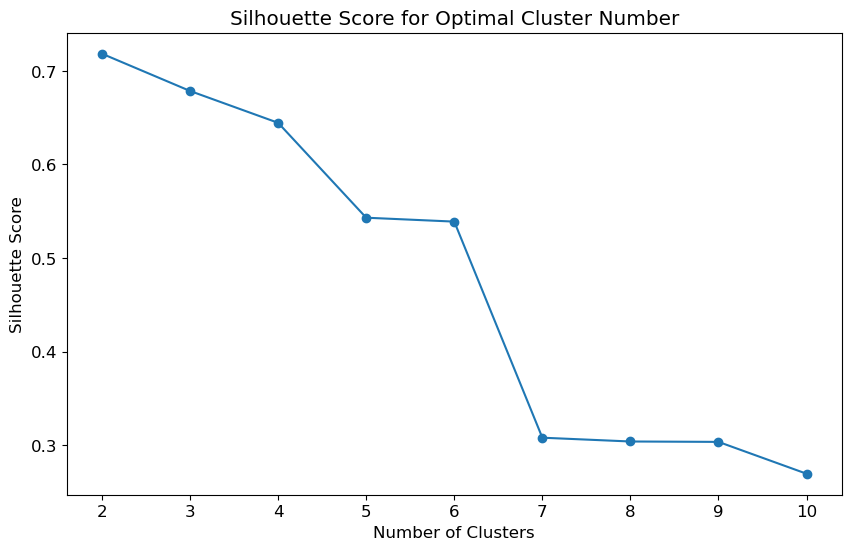

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load data without column headers
df = pd.read_csv('subreddit_embeddings.csv', header=None)

# Extract features for clustering
X = df.iloc[:, 1:]

# Try different cluster numbers and calculate silhouette score
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette score graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
conda install -c conda-forge libopenblas

In [ ]:
pip install --upgrade threadpoolctl

In [21]:
# Create an undirected graph using SNAP
UG = snap.ConvertGraph(snap.PUNGraph, G)

# Perform community detection using the Clauset-Newman-Moore algorithm
CmtyV = snap.TCnComV()
modularity = snap.CommunityCNM(UG, CmtyV)

# Print the results
print("Modularity:", modularity)
print("Number of communities:", CmtyV.Len())

# Optionally, print the nodes (subreddit names) in each community
for i, Cmty in enumerate(CmtyV):
    print(f"Community {i+1}: {len(Cmty)} nodes")
    
    # Retrieve subreddit names using node IDs
    subreddit_names = [k for k, v in community_to_id.items() if v in Cmty]
    
    # Print the subreddit names
    print("Subreddit Names:", subreddit_names)
    print()

Modularity: 0.9987679294249004
Number of communities: 2123
Community 1: 2 nodes
Subreddit Names: ['leagueoflegends', 'teamredditteams']

Community 2: 2 nodes
Subreddit Names: ['theredlion', 'soccer']

Community 3: 2 nodes
Subreddit Names: ['inlandempire', 'bikela']

Community 4: 2 nodes
Subreddit Names: ['nfl', 'cfb']

Community 5: 2 nodes
Subreddit Names: ['playmygame', 'gamedev']

Community 6: 2 nodes
Subreddit Names: ['dogemarket', 'dogecoin']

Community 7: 2 nodes
Subreddit Names: ['locationbot', 'legaladvice']

Community 8: 2 nodes
Subreddit Names: ['indiefied', 'aww']

Community 9: 3 nodes
Subreddit Names: ['posthardcore', 'bestof2013', 'corejerk']

Community 10: 3 nodes
Subreddit Names: ['gfycat', 'india', 'metalcore']

Community 11: 3 nodes
Subreddit Names: ['suicidewatch', 'offmychest', 'novacoin']

Community 12: 2 nodes
Subreddit Names: ['gaming4gamers', 'fallout']

Community 13: 2 nodes
Subreddit Names: ['kpop', 'dota2']

Community 14: 2 nodes
Subreddit Names: ['airsoft', 'a

Subreddit Names: ['buildapc', 'buildapcsales', 'music', 'asktrp', 'openbroke', 'crazyideas']

Community 100: 3 nodes
Subreddit Names: ['luthier', 'mandolin', 'personalfinance']

Community 101: 2 nodes
Subreddit Names: ['asktransgender', 'transpassing']

Community 102: 2 nodes
Subreddit Names: ['pokemonrng', 'shinypokemon']

Community 103: 3 nodes
Subreddit Names: ['gifrequests', 'community', 'help']

Community 104: 2 nodes
Subreddit Names: ['xxketo', 'keto']

Community 105: 4 nodes
Subreddit Names: ['karmacourtattorneys', 'karmacourtblog', 'rawdenim', 'dogecoinbeg']

Community 106: 2 nodes
Subreddit Names: ['shitredditsays', 'programming']

Community 107: 2 nodes
Subreddit Names: ['ptcgo', 'pokemon']

Community 108: 4 nodes
Subreddit Names: ['paradoxplaza', 'eu4', 'redkings', 'runescape']

Community 109: 2 nodes
Subreddit Names: ['rangers', 'hockey']

Community 110: 3 nodes
Subreddit Names: ['randomactsofgaming', 'globaloffensive', 'depression']

Community 111: 3 nodes
Subreddit Names:

Subreddit Names: ['tvadvice', 'hometheater', 'clashredditmike', 'svenskpolitik', 'mead', 'roguelikes', 'gundam', 'progmetal']

Community 190: 2 nodes
Subreddit Names: ['youtube', 'yms']

Community 191: 2 nodes
Subreddit Names: ['playrustservers', 'worldofrust']

Community 192: 2 nodes
Subreddit Names: ['crunchbang', 'debian']

Community 193: 5 nodes
Subreddit Names: ['4000dollarart', 'delusionalartists', 'bitcointip', 'cowboybebop', 'lowcar']

Community 194: 6 nodes
Subreddit Names: ['attackontitan', 'shingekinokyojin', 'fandomnatural', 'redoric', 'bitcoinmining', 'sixwordstories']

Community 195: 6 nodes
Subreddit Names: ['learnprogramming', 'compilebot', 'lipsthatgrip', 'highseddit', 'history', 'whatisthisthing']

Community 196: 8 nodes
Subreddit Names: ['dirtykik', 'dirtykikpals', 'truthordareme', 'civpetrania', 'lebanon', 'adhd', 'dota2trade', 'leagueone']

Community 197: 2 nodes
Subreddit Names: ['pjrp_community', 'percyjacksonrp']

Community 198: 8 nodes
Subreddit Names: ['xmen',

Subreddit Names: ['asknyc', 'divorce', 'codcompetitive', 'sethblingsuggestions', 'backtothefuture']

Community 268: 7 nodes
Subreddit Names: ['germusic', 'bravenewbies', 'writingcirclejerk', 'eldertrees', 'ama', 'cosplayers', '911truth']

Community 269: 13 nodes
Subreddit Names: ['orbitalsciences', 'spacex', 'drama', 'test', 'rails', 'wrongsubtitles', 'confession', 'yishansucks', 'alexis', 'compdota2', 'bdsmama', 'gunsforsale', 'jeep']

Community 270: 3 nodes
Subreddit Names: ['charlestonwv', 'westvirginia', 'giftofgames']

Community 271: 5 nodes
Subreddit Names: ['hamcraft', 'feedthebeastservers', 'wallpapers', 'slowcooking', 'fisting']

Community 272: 3 nodes
Subreddit Names: ['lovecraft', 'perfecttiming', 'disability']

Community 273: 2 nodes
Subreddit Names: ['diablo', 'diablo3monks']

Community 274: 3 nodes
Subreddit Names: ['shortscarystoriesooc', 'shortscarystories', 'peercoin']

Community 275: 7 nodes
Subreddit Names: ['erie', 'behrend', 'pathofexilebuilds', 'bestoftypos', 'win

Subreddit Names: ['drawforme', 'opensourcetextbook', 'makeupaddiction', 'misophonia', 'narutobattlegrounds', 'coilporn']

Community 332: 14 nodes
Subreddit Names: ['audioengineering', 'livesound', 'exchristian', 'latin', 'fantasybball', 'rage', 'nostalgia', 'portfolios', 'tipdoge', 'bookgiveaways', 'indianahoosiers', 'nationalguard', 'talesfromtechsupport', 'chemhelp']

Community 333: 16 nodes
Subreddit Names: ['fanficcrits', 'rational', 'webdev', 'conspirology', 'agitation', 'opentales', 'myday', 'huntsvillealabama', 'reformed', 'dan', 'sloths', 'wondertrade', 'troubledteens', 'detroitlions', 'afl', 'redditdads']

Community 334: 4 nodes
Subreddit Names: ['longue', 'reddit_silver', 'selfimprovement', 'psbf']

Community 335: 5 nodes
Subreddit Names: ['srsquestions', 'winmyargument', 'mapmaking', 'savageworlds', 'ecigclassifieds']

Community 336: 3 nodes
Subreddit Names: ['borderlands', 'borderlands2', 'arabic']

Community 337: 6 nodes
Subreddit Names: ['thailandlos', 'thailand', 'apocal

Subreddit Names: ['sweden', 'syriancivilwar', 'atlantathrashers', 'promptoftheday', 'rcrepo', 'dungeonworld', 'europe']

Community 388: 2 nodes
Subreddit Names: ['nodejs', 'javascript']

Community 389: 21 nodes
Subreddit Names: ['nhlchampionshipbelt', 'sanjosesharks', 'writinghub', 'iran', 'darkfuturology', 'hanguk', 'rotoscope', 'synogougeofsceptile', 'badatheism', 'jessicanigri', 'imgoingtohellforthis', 'studyroomf', 'rodina', 'thetruthishere', 'audible', 'halflife', 'automate', 'punjabi', 'houstonjobs', 'pakistan', 'realtors']

Community 390: 4 nodes
Subreddit Names: ['chicagogaymers', 'nogagreflex', 'sextoys', 'beagle']

Community 391: 2 nodes
Subreddit Names: ['mflb', 'vaporents']

Community 392: 5 nodes
Subreddit Names: ['ideasfortheadmins', 'trueprogressive', 'spammeddomains', 'ukraine', 'chicago']

Community 393: 4 nodes
Subreddit Names: ['ascensiongame', 'solforge', 'mensrants', 'singapore']

Community 394: 4 nodes
Subreddit Names: ['avesnyc', 'ravexchange', 'ifttt', 'newcerul

Subreddit Names: ['gtaglitches', 'gtacheaterspool', 'indiemakeupandmore', 'ideasforaskreddit', 'newaugusta', 'cthulhu', 'ideasforcirclejerk', 'rwbyoc', 'ultimate', 'gta', 'maddoge', 'robbereddit', 'nirvana', 'audiophile', 'madokamagica']

Community 448: 2 nodes
Subreddit Names: ['kickstarter', 'androidgaming']

Community 449: 7 nodes
Subreddit Names: ['cryptography', 'codes', 'ukesportshub', 'fifacareers', 'vexillology', 'itunes', 'wiihacks']

Community 450: 14 nodes
Subreddit Names: ['homeimprovement', 'infographics', 'outlier', 'vim', 'sideproject', 'swarje', 'tools', 'roguelikedev', 'astrocoin', 'onions', 'scryptmining', 'austinpoker', 'markmywords', 'jrpg']

Community 451: 2 nodes
Subreddit Names: ['badmovieideas', 'scenesfromahat']

Community 452: 9 nodes
Subreddit Names: ['ender', 'endersgame', 'popping', 'shittyaskhistory', 'sabres', 'photoshop', 'penguins', 'bitcoinmusic', 'stopsmoking']

Community 453: 2 nodes
Subreddit Names: ['sexworkers', 'hookers']

Community 454: 5 nodes


Subreddit Names: ['acnlpremium', 'ratemymayor', 'augmentedreality', 'uleth']

Community 503: 7 nodes
Subreddit Names: ['breadit', 'homebrewing', 'animalrights', 'stream_links', 'civhaven', 'metalgearsolid', 'korean']

Community 504: 4 nodes
Subreddit Names: ['thesims', 'thesimscontests', 'prolife', 'prochoice']

Community 505: 4 nodes
Subreddit Names: ['sexytimechat', 'ladybonersgw', 'nova', 'ussoccer']

Community 506: 8 nodes
Subreddit Names: ['hiking', 'socalhiking', 'badlinguistics', 'presidentender', 'coino', 'longisland', 'dayzbulletin', 'idliketobeatree']

Community 507: 20 nodes
Subreddit Names: ['geology', 'depthhub', 'houstonevents', 'vintageaudio', 'pettyrevenge', 'confessions', 'lost_2', 'kidsonline', 'gunreviews', 'snakes', 'longrange', 'baththoughts', 'rustfactions', 'boop', 'youtubehaiku', 'creepygaming', 'nflcirclejerk', 'frat', 'pervinca', 'toolbox']

Community 508: 6 nodes
Subreddit Names: ['xcountryskiing', 'olympics', 'trfu', 'classicalguitar', 'asktechnology', 'allt

Subreddit Names: ['universalcardtrading', 'pkmntcgreferences', 'askmath', 'myscape']

Community 550: 3 nodes
Subreddit Names: ['every_one_is_mod', 'debatefascism', 'msfreebooted']

Community 551: 2 nodes
Subreddit Names: ['titanfall', 'titanfall_x1']

Community 552: 12 nodes
Subreddit Names: ['dreamcast', 'allaccessplaylists', 'asksciencediscussion', 'correct_my_comment', 'brewgearfs', 'nfcring', 'philosophyofscience', 'asoiafreread', 'latvianjokes', 'gameofmoney', 'ocd', 'bitcoinuk']

Community 553: 23 nodes
Subreddit Names: ['indiebiz', 'smallbusiness', 'prius', 'killyourconsole', 'gunnnife', 'opticgaming', 'redditsucks', 'theydidthemath', 'dogefood', 'sunglasses', 'business', 'provoutah', 'vzla', 'pitt', 'skarinx', 'socialistprogrammers', 'imaginarycityscapes', 'random_acts_of_amazon', 'collegecooking', 'conservatives', 'insidegaming', 'minecraftnovels', 'dogetippingfun']

Community 554: 13 nodes
Subreddit Names: ['mcpegriefers', 'worstserverever', 'tattoos', 'civmonaco', 'retiredgi

Subreddit Names: ['spinalcordinjuries', 'plotholes', 'dickbutt', 'hardtrance', 'birdswitharms', 'harmontown', 'triumph', 'cfbcirclejerk', 'photoshoprequest', 'de', 'realdefinitions', 'madmod', 'mildlyreposting', 'sherlockfic', 'everysinglethread', 'litebar', 'raoaopenmodmail']

Community 592: 2 nodes
Subreddit Names: ['csuohio', 'cwru']

Community 593: 23 nodes
Subreddit Names: ['beercoins', 'bitcoinreferrals', 'kentstateuniversity', 'cerebral', 'nope', 'madscientist', 'holmes', 'banishedmodding', 'svexchange', 'cowm', 'euromaidan', 'thinktank', 'comcast', 'starboundplanets', 'caper', 'srsliberty', 'projectcss', 'conspiracynorules', 'ultrabooks', 'aquarium', 'thewall', 'consolerepair', 'humboldt']

Community 594: 6 nodes
Subreddit Names: ['collegehockey', 'fightingsioux', 'orangelondo', 'coloradommj', 'ocontenders', 'srsfunny']

Community 595: 16 nodes
Subreddit Names: ['supplements', 'joerogan', 'survivinginfidelity', 'auslaw', 'nursing', 'lolwallpaper', 'shadowbanned', 'ft86', 'arche

Subreddit Names: ['typescript', 'angularjs', 'pc98touhou', 'cinemagraphs', 'halflife3', 'what_to_ask_gaben', 'gayincest', 'bestofbapc', 'channelspotlights', 'sacrepublicfc', 'civepicus', 'allhail']

Community 642: 3 nodes
Subreddit Names: ['kdrama', 'asiandrama', 'jdorama']

Community 643: 12 nodes
Subreddit Names: ['rct', 'rollercoastercontests', 'vcu', 'tsvhatching', 'taiwan', 'gameoverbar', 'bostonboardgames', 'autoflowers', 'iosprogramming', 'laderagranola', 'republicofnews', 'wanderassociation']

Community 644: 4 nodes
Subreddit Names: ['bigeast', 'bracketchallenge', 'harimenui', 'original_sin']

Community 645: 6 nodes
Subreddit Names: ['apotheosisvillage', 'colosseumtournament', 'bisexual', 'doommetal', 'stopcomcast', 'lanparty']

Community 646: 4 nodes
Subreddit Names: ['pipetobaccomarket', 'pipetobacco', 'titan_fall', 'mangasuggest']

Community 647: 24 nodes
Subreddit Names: ['noragami', 'animevectorwallpapers', 'getmotivatedbuddies', 'voxfps', 'imaginarylandscapes', 'truedota2

Subreddit Names: ['mlquestions', 'machinelearning', 'puff2tuff', 'annamasterrace', 'ladymras', 'marvel', 'rpgpuzzles', 'tf2au', 'kichuku', 'architecture', 'stopselfharm', 'felicityfarm', 'database']

Community 681: 4 nodes
Subreddit Names: ['911dispatchers', '911calls', 'hotpeppers', 'banshee']

Community 682: 5 nodes
Subreddit Names: ['realsocialengineering', 'socialengineering', 'srsgaming', 'umagic', 'minecraftmodels']

Community 683: 9 nodes
Subreddit Names: ['chinesephones', 'pickanandroidforme', 'tdcs', 'plumesofhazard', 'poppunkers', 'battlegifs', 'insorum', 'ketorage', 'democrats']

Community 684: 3 nodes
Subreddit Names: ['kpoop', 'kpics', 'mcwt']

Community 685: 57 nodes
Subreddit Names: ['askastronomy', 'rtlsdr', 'leaves', 'soundersfc', 'hivaids', 'beyondthesummit', 'stalker', 'creepypasta', 'panoramicgifs', 'imagestabilization', 'prolog', 'yankees', 'libertyworldproblems', 'hatfilms', 'nuitakeover', 'asklinguistics', 'tooafraidtoask', 'islandofwarriors', 'navy', 'clermontfd

Subreddit Names: ['schizophrenia', 'arttocope', 'characterdrawing']

Community 716: 4 nodes
Subreddit Names: ['nycmeetups', 'nyr4r', 'bookquotes', 'bf4_ps4_3rd_platoon']

Community 717: 11 nodes
Subreddit Names: ['torrents', 'illegaltorrents', 'ecr_gaming', 'bedroomproducers', 'concepts', 'microbiome', 'nyyankees', 'bestofrekt', 'alienware', 'd3up', 'crowdfundbitcoin']

Community 718: 4 nodes
Subreddit Names: ['hardcoresmp', 'kohi', 'edinburgh', 'tdpwriting']

Community 719: 3 nodes
Subreddit Names: ['labrador', 'vizsla', 'rollme']

Community 720: 19 nodes
Subreddit Names: ['blocklandishorrible', 'blockland', 'fth', 'nancydisgrace', 'upliftingnews', 'mafia', 'thatincelblogger', 'freesoftware', 'asoiafcirclejerk', 'swingers', 'janesphoenix', 'ilstu', 'randomactsofpolish', 'userbattleslore', 'frozenrehab', 'dogecoinau', 'teenagerscourt', 'postprocessingclub', 'trueredditdrama']

Community 721: 26 nodes
Subreddit Names: ['asksf', 'sfbayhousing', 'sfhousingadvice', 'cpp', 'scams', 'redditw

Subreddit Names: ['germanmilitaria', 'wwi', 'gif', 'scifiwriting', 'teenxchromosomes']

Community 752: 19 nodes
Subreddit Names: ['drinkingdollars', 'swagbucks', 'dinosaurs', 'resistancehigh', 'brokengifs', 'grasshoppervape', 'terracoin', 'unitedwestand', 'rstudio', 'sas_watch', 'flagstaff', 'highschooldxd', 'bottest', 'altnames', 'uofi', 'shamepolice', 'stephenking', 'h1z1', 'box5']

Community 753: 36 nodes
Subreddit Names: ['subredditdramax6', 'subredditdramax5', 'debate', 'japanesegameshows', 'houstonr4r', 'mtb', 'myriadcoin', 'universityofhouston', 'gtavmodding', 'postcollapse', 'worstadviceever', 'survivalist', 'askgames', 'ask', 'noahbradleycirclejerk', 'ohtaigi', 'dogeking', 'overthoughts', 'metalguitar', 'tulane', 'instagram', 'selfsufficiency', 'mainebeer', 'zombiesurvivaltactics', 'epl', 'saintsrow', 'pennystocktrading', 'demoncycle', 'datasets', 'tf2eastcoast', 'getnarwhal', 'masculism', 'improveworld', 'alchestbreach', 'lastofus', 'assholes']

Community 754: 6 nodes
Subredd

Subreddit Names: ['indie', 'fantanoforever', 'cringeworthy', 'competitivetitanfall', 'hoco', 'columbiamd', 'opencaptioning', 'inkstone', 'fitmeals', 'nononono', 'glutenfree', 'cocredditpapa', 'mastercoin', 'dogecoinshoppersforum', 'thisisthewayitwillbe', 'nolapelicans', 'icryevertim', 'annarbor', 'jailbreakhelp', 'lsu', 'lsufootball', 'ukdota', 'talesfromsecurity', 'podcasting', '3dmodeling', 'leaf', 'ldscirclejerk', 'deadredditors', 'thunder', 'asktrollx', 'rock']

Community 785: 7 nodes
Subreddit Names: ['sexy_saffron', 'girlsgonedopecoin', 'servituderp', 'pokemonconspiracies', 'narcissisticabuse', 'shopify', 'mindundercontrol']

Community 786: 16 nodes
Subreddit Names: ['weirdwritingweekend', 'yourserial', 'mutcoinselling', 'chicagoraoameetup', 'airsoftdeals', 'incestporn', 'randomactsofshaving', 'mud', 'yester', 'thehallsofsagan', 'cagonewild', 'orlandomagic', 'sixers', 'suns', 'entj', 'iasip']

Community 787: 5 nodes
Subreddit Names: ['bestofstreamingvideo', 'fullmovieonimegashare

Subreddit Names: ['amrmythos', 'amrsucks', 'naturegifs', 'ourhockeycast', 'alphaandbetausers', 'yardsale', 'burger', 'veganpogrom', 'imaginarytyria', 'imaginarywesteros', 'ebooks', 'weeklyimprovement']

Community 821: 23 nodes
Subreddit Names: ['ukraina', 'politota', 'whichbike', 'foraging', 'c_programming', 'heroesofthestorm', 'canning', 'dysfunctionalfamily', 'matthersonps2', 'frozenfun', 'scarcade', 'bikefit', 'utxshiro', 'keywordtipbot', 'theclonewars', 'unsolvedmysteries', 'newyorkislanders', 'edmontonoilers', 'dallasstars', 'bsufootball', 'scooters', 'redditcantjump', 'jritslounge']

Community 822: 5 nodes
Subreddit Names: ['opensuse', 'wallpaper', 'itwasagraveyardsmath', 'augusta', 'johnnymanziel']

Community 823: 19 nodes
Subreddit Names: ['isenburg', 'housedarsk', 'gawminers', 'reasonablefaith', 'abuseporn2', 'firstmarathon', 'kpopslumberparty', 'cartoons', 'jars', 'serversmash', 'folkpunk', 'creativereinvesting', 'bungie', 'eatcheapandhealthy', 'shittyoutoftheloop', 'competit

Subreddit Names: ['flashfiction4you', 'poetryprompts', 'sofp']

Community 860: 41 nodes
Subreddit Names: ['papgrappen', 'cirkeltrek', 'nfldev', 'bottiquette', 'isrconspiracyracist', 'highresnsfw', 'gtaglitchingbuddies', 'surrealbeliefs', 'rotc', 'craftexchange', 'savagegarden', 'epicthread', 'hapkido', 'worldcrisis', 'solarroadways', 'html5', 'cheap_meals', 'creditcards', 'entraideinformatique', 'browsers', 'androidgames', 'programmation', 'tagprowc', 'oneparagraph', 'mythology', 'maschine', 'jewelers', 'reformedfightclub', 'piratenpartei', 'diamondhunt', 'permies', 'womensrights', 'bulkorcut', 'charactercrossovers', 'phillies', 'examplebot12348', 'pureawesomeness', 'redditnow', 'ocaml', 'redditkappa', 'rbnmovienight']

Community 861: 22 nodes
Subreddit Names: ['vaast', 'ofr', 'darksoulshelp', 'lgbtpdx', 'theaquamarineregiment', 'overuseofnow', 'bitcoinmallorca', 'thewholecar', 'gotg', 'free_images', 'askstrawfeminists', 'swingersengland', 'malegrooming', 'combinedgifs', 'topsandbottom

Subreddit Names: ['barefoot', 'barefootrunning', 'twincitiesents', 'tampabayrowdies']

Community 878: 14 nodes
Subreddit Names: ['pokemonrmxp', 'pokemonorderchaos', 'vipergonewild', 'illinois', 'civmulti', 'dogecoinsurvivalguide', 'bandung', 'reportthespam', 'uklaw', 'detoxcraft', 'defcoin', 'amongthesleep', 'galaxynexus', 'cryptoanarchy']

Community 879: 4 nodes
Subreddit Names: ['bahrain', 'countrychallenge', 'cubers', 'mhoc']

Community 880: 15 nodes
Subreddit Names: ['talesfromthesquadcar', 'elmonorojo', 'tagproworldcup', 'needtobreathe', 'kcjobs', 'askretail', 'ti4network', 'tipofmyhoof', 'schizoaffective', 'republicanism', 'serpounce', 'poroyang', 'tacoma', 'massachusetts', 'olympia']

Community 881: 5 nodes
Subreddit Names: ['uwyo', 'wyoming', 'dustforce', 'shanghaigaybros', 'snapchat']

Community 882: 13 nodes
Subreddit Names: ['rule34', 'rule34_albums', 'lectures', 'girlfartstories', 'cleanenergy', 'ixcoin', 'insurgency', 'techtheatre', 'vintagecomputing', 'runningwithdogs', '

Subreddit Names: ['cybercock', 'lgbtsex', 'redditoffline', 'thelovelinecompanion', 'natusvincere', 'dotamasterrace', 'edmontonjobs', 'michiganriders', 'gold', 'features', 'makenewfriendshere', 'thedealisoff', 'grindr', 'smashbrosonline', 'dogecoinfundation', 'karmateam', 'filesharing', 'subredditux', 'googlecardboard', 'thelounge', 'boardgamegreek', 'cfbofftopic', '332e313431353932', 'gremlinjuice', 'kornaycoollair', 'ccgstudies']

Community 913: 13 nodes
Subreddit Names: ['minontrovouchs', 'rotmgtradingpost', 'pokemonzotrades', 'redditsnow', 'conflictnews', 'ketotrees', 'webafanpopup', 'webms', 'jmu', 'savethesub', 'programing', 'whiskey', 'strife']

Community 914: 4 nodes
Subreddit Names: ['denverseddit', 'denverjobs', 'endcard', 'ingress']

Community 915: 17 nodes
Subreddit Names: ['theravada', 'thaiforest', 'samesexdesires', 'steamcoupons', 'weightlossbif', 'quotebattles', 'estoration', 'objectivec', 'addiction', 'usbedc', 'rule34requests', 'starcrafthaircuts', 'progether', 'grantu

Subreddit Names: ['askasurvivor', 'zombieapocalypse', 'srsbeliefs', 'vericoin', 'theydidthemonstermath', 'lbregs', 'atlbeer', 'nsfw_html5', 'sfsu', 'endtimesprophecy', 'robocraft', 'dota2pubstomps', 'dcrideit', 'craftsoficeandfire', 'metawebgames', 'legaladviceuk', 'fcukaderptoremembereh']

Community 938: 3 nodes
Subreddit Names: ['solving_reddit_codes', 'topsecret', 'gunmeetups']

Community 939: 14 nodes
Subreddit Names: ['wdtsg', 'gfycatlinkfixerbot', 'avgn', 'falconsuk', 'citybound', 'purplebrick', 'joshdonaldson', 'cookiedecorating', 'terrybrooks', 'rconservativenews', 'rimworld', 'kateeowen', 'wet_shavers', 'theologia']

Community 940: 6 nodes
Subreddit Names: ['mastergruntr75', 'asoiafpowers', 'bit451', 'dota2ita', 'galihan', 'superrp']

Community 941: 18 nodes
Subreddit Names: ['focust25', 'ddpyoga', 'picklemilitia', 'pctechnicians', 'posture', 'lifeinapost', 'zov', 'uwo', 'voicework', 'water', 'yugioh101', 'pcos', 'asklaw', 'boxeo', 'freenas', 'classic4chan', 'fml', 'edgewaterr

Subreddit Names: ['smashingpumpkins', 'movingday', 'redditmadeasong', 'aleaguematchday', 'unidan', 'santashelpers']

Community 967: 44 nodes
Subreddit Names: ['seekinghenna', 'unbelievableevents', 'askdoctors', 'amateur_boxing', 'lowcarb', 'southshore', 'realestatetechnology', 'redditarmie', 'rektreational', 'nordiccountries', 'redditro', 'ragnarokonline', 'cardwarstcg', 'stilltrying', 'ethan_kahn', 'olympiquelyonnais', 'trolledbynarcissists', 'battleshops', 'orangeisthenewblack', 'nsfu', 'skincareaddictionuk', 'ffxivfriends', 'khazar_pride', 'afterlodge', 'celiac', 'uga', 'gametheory', 'adamcarolla', 'cyclonenation', 'clubteen', 'boating', 'vertical', 'saab', 'losttoucans', 'gethighandwrite', 'elitetraders', 'uncensorship', 'buildapchelp', 'megaming', 'tampabayrays', 'beatmatch', 'acworth', 'elkhart', 'fulfillmentbyamazon']

Community 968: 12 nodes
Subreddit Names: ['pacificnorthwest', 'lookatmydog', 'iamadragonama', 'thelastpsychiatrist', 'athens', 'cleganebowl', 'newtothenavy', 'arc

Subreddit Names: ['utopiatv', 'orphanblack', 'machinelearners', 'ypsi', 'makeupdeals', 'souleater', 'redditpersonality']

Community 996: 5 nodes
Subreddit Names: ['redditplayschess', 'testuhc', 'tzm', 'stateball', 'lonelygamers']

Community 997: 2 nodes
Subreddit Names: ['solving_mnxwizi', 'mnxwizi']

Community 998: 40 nodes
Subreddit Names: ['sgap', 'zponymotes', 'gbrpolitics', 'learnandroid', 'freehugsbattlefield', 'galaxys5', 'pokeplazareferences', 'fidelisserver', 'tas_uni', 'kpopchords', 'autowikiabot', 'pokemoncontests', 'cerpen', 'listentothat', 'integratedprogression', 'xdp', 'alternativeart', 'beerdreams', 'ogn', 'mylatintattoo', 'mawinstallation', 'indianfood', 'enail', 'onetrueklein', 'dentalrdh', 'lesbiangamers', 'rcsources', 'corporatecirclejerk', 'riftmax', 'playbattlefield', 'dynastyclash', 'worldpowerball', 'journaling', 'diamondbacks', 'uberhaxornova', 'subwoofer', 'minlangs', 'showercomebacks', 'liftingroutines', 'hammers']

Community 999: 15 nodes
Subreddit Names: ['

Subreddit Names: ['admalledd', 'mcworldbuilding', 'cthulhuandcats', 'gonenatural', 'antipoaching', 'stuffyangsays', 'newrightcirclejerk', 'freehugsmc', 'baseballoffseason15', 'redditlurkers', 'videos_discussion', 'frozengames', 'dota2test', 'tumblratrest', 'theteamleague', 'roleplayponies', 'deadlinesociety', 'phascinatingphysics', 'socialisthumour', 'pokemonblackmarket', 'tartarusredux', 'dogecoinstories', 'redditwhiskey', 'ripple', 'dataconspiratardshate']

Community 1020: 6 nodes
Subreddit Names: ['khan', 'piggycoin', 'virtualization', 'wellingtoneating', 'gitcp', 'allthingsmech']

Community 1021: 19 nodes
Subreddit Names: ['casualmovies', 'boxoffice', 'learnuselesstalents', 'cocopommel', 'hailmilitary', 'kjv', 'videogames', 'burma', 'ukcigars', 'sandboxtest', 'diablo3xboxone', 'curvemeister', 'buenosaires', 'warmachine', 'winnipegdodgeball', 'zoology', 'permafree', 'epicspace', 'ynab']

Community 1022: 70 nodes
Subreddit Names: ['wowservers', 'level20love', 'srsbooks', 'therealmofm

Subreddit Names: ['clickfunnels', 'afolon', 'ssbm', 'depressed', 'animvotes', 'bombing', 'borderlandsguns', 'spaceribs', 'kol', 'phgamers', 'civ_cw_government', 'twoxsex', 'oneliners', 'sdcolorado', 'ownit', 'podemoscannabico', 'breakcore', 'servicenow', 'fulltvshowsonyoutube', 'extensionourense', 'ytpmv', 'cordkillers', 'cerealkillaclone', 'wildlife', 'loldads', 'sharepoint', 'bojackhorseman', 'excaliburszonegaming', 'f1meetup', 'militaryfaq', 'ketofastfood', 'globalagenda2', 'notrailer', 'blackish', 'teachinginkorea', 'worldnews2', 'steamporn', 'shiteuropeanssay', 'fashionreps', 'dodge', 'bestofrelevantun', 'askphilly', 'feduk', 'sydneytrees', 'aws', 'pcc', 'acoustics', 'notafryingpanmedia', 'ello2', 'politicalcalifornia', 'craftit', 'photochallenge', 'livestock', 'consulting', 'pkmnredditleague', 'manchildlifehacks', 'humanfanclub', 'polskapoland', 'porterrobinson', 'doodles', 'theoryofpropaganda', 'porngifsbybot', 'askreligion']

Community 1043: 16 nodes
Subreddit Names: ['farright

Subreddit Names: ['equipment', 'axiscapitalgroup', 'trovetrading', 'libertarianaustralia', 'greypoooftheday', 'datfeel', 'passionx', 'britpics', 'truelurkers', 'learnjava', 'tbcraft']

Community 1068: 22 nodes
Subreddit Names: ['kanechroniclerp', 'journalentries', 'joomla', 'ghost_in_the_shell', 'thestage', 'mhocpress', 'kanmusu', 'halibut', 'rockvillemd', 'nexus6', 'deafskype', 'imagus', 'bodyboarding', 'mildlyterrifying', 'flippinguk', 'battlewagon', 'bluejacketsgwg', 'saplingstories', 'puzzleanddragons', 'wp_nwi', 'animegifs', 'anonabox']

Community 1069: 16 nodes
Subreddit Names: ['gamerghazi', '8chan', 'dota2team', 'mut360', 'networkmindstogether', 'studentloandefaulters', 'uprising18', 'coffeeandtv', 'sydneymotorcycles', 'dotawww', 'dreamtheater', 'clickerheroes', 'girlskissing', 'virginients', 'vapeheads', 'aclfestival']

Community 1070: 19 nodes
Subreddit Names: ['southcarolina', 'hiltonhead', 'furniture', 'hitsuginochaika', 'thisweekinnascarposts', 'evilgeniuses', 'dadreflexes

Subreddit Names: ['mlearning', 'elearning', 'skyre', 'whoamiakabizarro', 'lomactionparty', 'lomsanddunes', 'iww', 'spinnelein', 'openvms', 'hqmoffice', 'pure', 'candidporndescription', 'wemetonline', 'thecubepolls', 'internetparents', 'civbesaves', 'rgtrc', 'publishing', 'catsvstechnology', 'solopokes', 'unsubbed', 'toosoon', 'fifthworldpics', 'fifthworldemoticons', 'clintisnumberfour', 'vintagetools', 'rampaige', 'fallinginreverse', 'polyfamilies', 'soccernerd', 'lifeafterbenzos', 'kerrimawrites', 'gamephysics', 'tangerinetycoon', 'centrallouisiana', 'truewomensliberation']

Community 1087: 9 nodes
Subreddit Names: ['litecoindark', 'worldcoinalliance', 'quinineglow', 'iresearchreporter', 'boatbuilding', 'badperson', 'britain', 'solforgesharing', 'gizzletinks']

Community 1088: 38 nodes
Subreddit Names: ['invisibleball', 'invisiball', 'ppsspp', 'omnitopiatechnocracy', 'monstercatcringe', 'wheredoistart', 'mhocstrangersbar', 'someball11', 'regina', 'drobo', 'ausguns', 'outernet', 'dontp

Subreddit Names: ['civilexchange', 'civilexmerchantsguild', 'wrol', 'onegameamonth', 'offseasonnrleague', '52book', 'fcdallas', 'jtv', 'zensangha', 'justatest74', 'salemma', 'wellthatsucks', 'starwarsrebels', 'hfybeta', 'downloadcodes', 'animaltextgifs', 'supersecretbases', 'aussiepolish', 'londonsocialjamclub', 'rpgdesign', 'liquor', 'watercolor', 'talesfromthejob', 'other', 'tipmywork', 'eafifapc', 'barbattlestations', 'formcheck', 'nokia', 'tradeorgift', 'worstofmspaint', 'spg', 'sdmoon', 'cinemasins', 'themoddingofisaac', 'ultraviolent', 'captionplease']

Community 1111: 7 nodes
Subreddit Names: ['gunz', 'gunz2', 'powermetal', 'animepartygifs', 'feathersquad2', 'borednignored', 'linkinpark']

Community 1112: 12 nodes
Subreddit Names: ['totaldramamurder', 'totaldramamurders', 'officialrockstar408', 'plotgraveyard', 'michiganwolverines', 'toothpicks', 'motovlogging', 'blackfriday', 'flirtcoin', 'imsavingupforthis', 'hawkeyesquad', 'dotapasta']

Community 1113: 4 nodes
Subreddit Names

Subreddit Names: ['ohcumon', 'maletributeme', 'bigh', 'xss', 'dfwbike', 'waifuism']

Community 1137: 19 nodes
Subreddit Names: ['wishlist', 'livetweetingoldmovies', 'sickbeard', 'freudigegrafen', 'smashart', 'kismet', 'gear4sale', 'bestof2014', 'podemosantequera', 'iranpolitics', 'sunsetoverdrive', 'dailytechnewsshow', 'harvard', '3framemovies', 'theorangepeel', 'apocolyptictodd', 'dubbedgifs', 'workaholics', 'wigglebutts']

Community 1138: 28 nodes
Subreddit Names: ['ultramanfans', 'resinkits', 'scarybusey', 'stringcheeseincident', 'threepedals', 'liquidsky', 'zanesville', 'n24', 'crd', 'treehouseofhorrors', 'wrestlewiththeplot', 'batch', 'lggwatchr', 'graymattergaming', 'perupics', 'deathlings', 'twentyonepilots', 'robloxgamedev', 'rurounikenshin', 'pdqdeploy', 'agatheringofheroes', 'nj4nj', 'patents', 'multiverseminer', 'foodhaikus', 'colorists', 'unagenda21', 'sweetietart69']

Community 1139: 4 nodes
Subreddit Names: ['whowouldwinworkshop', 'collabcomics', 'lolcats', 'motorcyclemem

Subreddit Names: ['greenville', 'upstatesc', 'bitquest', 'blowjob', 'ayahuasca', 'anticommon', 'argaming', 'leelahsposts', 'nonverbalcomm', 'sbu', 'tiwafb', 'musicsuggest']

Community 1157: 33 nodes
Subreddit Names: ['xamarinandroid', 'persevy', 'asiatagpro', 'flagermus', 'fringefashion', 'wikipediainaction', 'paganism', 'marketanarchism', 'missingachievements', 'omnipotent_league', 'rubberducks', 'spiceandwolf', 'kaizenbrotherhood', 'competitivewow', 'fakeidreviewhub', 'insidejorahshead', 'etiquette', 'birthparents', 'earthoficeandfire', 'conlangscirclejerk', 'gratefuldoe', 'myrtlebeach', 'lukeschwade', 'grindsmygears', 'chicagotrees', 'stockpick', 'prisonarchitect', 'newsporn', 'viacoin', 'adoptasilver', 'ptnews', 'aetherysrs', 'gamecocks']

Community 1158: 12 nodes
Subreddit Names: ['mmorpg_css', 'rmmorpgdiscussions', 'gayforoberyn', 'ttchealthy', 'eurasianlynx', 'startrekviewingparty', 'westeroscraft', 'spyrothedragon', 'contemporary', 'frostbitefalls', 'abdlexchange', 'videoengine

Subreddit Names: ['gallowboob', 'reddittrophies', 'podemoscsc', 'izlam', 'baduk', 'embroidery', 'cringejokes', 'woodenpotatoes', 'parrotheads', 'peripheryband', 'musicaltheatre', 'togetheralone', 'agentcarter', 'racinggames', 'chocolate', 'ripplesandwaves', 'hbgg', 'shittitle', 'mabinogi', 'lootcrate', 'sportdocumentaries', 'wordsnshit', 'bestofcracked', 'dahouse', 'ucep', 'pvm_virus', 'mcgillcirclejerk', 'austinketo', 'shoppingaddiction']

Community 1184: 7 nodes
Subreddit Names: ['neohbeer', 'brewhio', 'ccnp', 'guitarhero', 'windmobile', 'cyphers', 'ffxv']

Community 1185: 5 nodes
Subreddit Names: ['symphonicmetal', 'nightwish', 'beautyguruchat', 'angelawhite', 'globaloffensive_vods']

Community 1186: 27 nodes
Subreddit Names: ['duvrangrgata', 'attackofthebteam', 'datamining', 'denverbitcoin', 'waterfox', 'mtgporn', 'housefaces', 'harp', 'tinyleaders', 'modelldiskussion', 'onehundredups', 'plazaillesbalears', 'plazaaragon', 'pzacastillalamancha', 'plazaregionmurcia', 'a_randomless_ch

Subreddit Names: ['gothstyle', 'goth', 'bateri', 'superfantasypowers', 'fantasyfa', 'metacancersubdrama', 'fakealbumcovers', 'narratemystory', 'supremecommander']

Community 1203: 16 nodes
Subreddit Names: ['taxi', 'shittywritingprompts', 'ikarus', 'fontspotting', 'nsfwcosplay', 'hazardops', 'bettercallsaul', 'freshofftheboattv', 'nfl2015offseason', 'tapeswaps', 'gcc', 'askrealhipsterglasses', 'gunnithallofhonor', 'jumbify', 'njpw', 'cranberryletters']

Community 1204: 36 nodes
Subreddit Names: ['brassholes', 'makeaband', 'montrealimpact', 'shigatsuwakiminouso', 'asannyc', 'suspiciousquotes', 'aviationmaintenance', 'word', 'shitgunnitupvotes', 'crumbsinthedark', 'islaam', 'lonewolfdist', 'gerontology', 'type2diabetes', 'ps4gifs', 'pdxkbc', 'primecoin', 'fxstunts', 'animalwelfare', 'winkhub', 'pureanarchy', 'fairytales', 'overcominggravity', 'robzombie', 'ksptomars_media', 'sisalta', 'quantikxanax', 'premiere', 'kirby', 'me_irl', 'chubby', 'pne', 'axolotls', 'race_reality', 'wesanderson

Subreddit Names: ['plainstriders', 'metaplainstriders', 'codwaw2', 'hotvanillaaudio', 'wbafootball', 'gravemind']

Community 1225: 2 nodes
Subreddit Names: ['communalists', 'communalistbookclub']

Community 1226: 11 nodes
Subreddit Names: ['consoleproletariat', 'consolegaming', 'nosgoth', 'earningreports', 'thepodcastshow', 'magicquartersmp', 'middleeasthistory', 'yemenicrisis', 'mhocsatire', 'psmf', 'psyc2371']

Community 1227: 8 nodes
Subreddit Names: ['sissypersonals', 'valdosta', 'summit', 'famfrit', 'zines', 'nationalphotosubs', 'ppse', 'foobar2000']

Community 1228: 6 nodes
Subreddit Names: ['officialnyldy', 'amateur', 'cuponme', 'seramancers', 'pokemonqrrequests', 'distance']

Community 1229: 15 nodes
Subreddit Names: ['dfwclassifieds', 'golfclassifieds', 'bookiegg', 'postleftanarchism', 'vive', 'dixie', 'hotlinemiami', 'tarheels', 'stellar', 'lasvegasgaymers', 'yams', 'hue', 'mhoiririshtimes', 'csgotrading', 'tagprostatistics']

Community 1230: 22 nodes
Subreddit Names: ['alexa

Subreddit Names: ['upvotedbecausegrill', 'upvotedbecausegirl', 'tenninetythreewrites', 'behindtheproject', 'civaigames', 'wingsofglory', 'steamvr']

Community 1255: 26 nodes
Subreddit Names: ['shoplifting', 'lossprevention', 'writeresearch', 'tacos', 'corvuscivcraft', 'eridanusinsurrection', 'irejobs', 'razorbacks', 'wigan', 'publicmmcorp', 'flytapemakesfunofyou', 'manchester_uni', 'libertyuniversity', 'hbogo', 'bicycleengineering', 'hololens', 'art4tips', 'tampaamiibocollectors', 'hagabadla', 'newsokuvip', 'dragon029', 'f35lightning', 'hollandmichigan', 'ventchat', 'geb', 'scoutingireland']

Community 1256: 23 nodes
Subreddit Names: ['occult_ja', 'bakanewsjp', 'dota2_jp', 'redditheroesclan', 'venice', 'jayhawks', 'alphadraft', 'touhou_jp', 'ozarkmakerspace', 'nostalriusbegins', 'theroom', 'sustainability', 'freedf', 'nin', 'montgomerycountymd', 'explainlikeimphd', 'crystalclear', 'actualconspiracies', 'heroeschargecommunity', 'pansexual', 'battlefieldhardline', 'littlehelperrobot', 't

Subreddit Names: ['southburlington', 'burlington', 'casualmath', 'atlantafalcons', 'draxagon', 'fairshare', 'divergent_gaming', 'globaloffensivelinux', 'plazapuertodelrosario', 'webvr', 'shadowq', 'todayistruggled', 'redditjuliet', 'todayilearned_jp', 'cmewgafinewscat', 'thebutton', 'nonpressers', 'tree_fiddy', 'okcc', 'shacknews', 'mawofchaos', 'mrdata', 'asianladyboners', 'dallasmeetups', 'reddithounds', 'socalr4r', 'thirdwavefeminism', 'dominions4', '59s', 'bighero6', 'nvidiashield', 'mbotandgtron', 'pears', 'cqb', 'nomina', 'iwishiwaslucky', 'pmmodi', 'iupui', 'cbf4life', 'churchofthebutton', 'cryptoubi', 'advicecountries', 'csmapmakers', 'chirpit', 'chicagoroommates']

Community 1272: 26 nodes
Subreddit Names: ['knightsofthebutton', 'pstknights', 'furrywritingprompts', 'doctorwhofanfic', 'cuefour', 'nonpresser', 'gamesmeta', 'phishing', 'mumbleultrahardcore', 'newfoundlander', 'dayzunservers', 'ernietinkle', 'yestap', 'cultofthebutton', 'grrrlriot', 'thegreyhopeful', 'team60s', 's

Subreddit Names: ['reignofkings', 'reignofkingsservers', 'amaworldbuilding', 'manlove']

Community 1289: 28 nodes
Subreddit Names: ['teamitup', 'humorideas', 'lazygrower', 'comicthreads', '1200isplentyketo', 'abolish', 'yearofart', 'bofhsysadmin', 'p18s', 'corkyromano', 'pocketwatch', 'thegreywardens', 'knifeparty', 'pendulum', 'brotherche', 'lifeoflisa', 'thebuttongrove', 'theundisclosedpodcast', 'runningcringe', 'drwcirclejerk', 'gunplatestprofiles', 'graphicsprogramming', 'pdicgfeec', 'mizunekochan', 'piratedgta', 'fourleafstudios', 'dcuonline', 'vinylscores']

Community 1290: 2 nodes
Subreddit Names: ['shittytechprotips', 'technologyprotips']

Community 1291: 12 nodes
Subreddit Names: ['nsfw_btsync', 'gingerpuss', 'smitetrades', 'rigganantioch', 'serialgrudgematch', 'lommarket', 'lansing', 'headphoneporn', 'getfairshare', 'mhykol', 'bloodbornesliders', 'rakugakicho']

Community 1292: 57 nodes
Subreddit Names: ['skrillfiles', 'unreleasedfiles', 'okcbombingconspiracy', 'sundayexchang

Subreddit Names: ['dangerouslystupid', 'dangeroususers', 'pokechu22', 'btownexchange', 'team60ssecretreb', 'storyclouds', 'boigodmode', 'collegebros', 'placeholdersinc', 'csgoscores']

Community 1310: 53 nodes
Subreddit Names: ['realmsconflicts', 'therealmsmc', '4anl', 'kinoko_jp', 'gamindustri', 'vrsites', 'race_realism', 'yayamateurs', 'continuityporn', 'theleft', 'modelwesternstate', 'indypopcon', 'djtunes', 'deadlyunicorn', 'paxchecker', 'mattress', 'midair', 'benin', 'muppets', 'dirtgame', 'siliconvalley', 'sesamestreet', 'dvzcirclejerk', 'snooker', 'pararoo', 'thehitchhikers', 'flash', 'ocala', 'danishents', 'islamicstudies', 'bitcoingambling', '64realquick', 'anarcho_reaction', 'miband', 'elitelavigny', 'dontrevivemebro', 'modelushousewaysmeans', 'imptech', 'laurentia', 'thedarkmountain', 'trainsim', 'trancecirclejerk', 'notbirdswitharms', 'glutenfreecooking', 'pcgiveaways', 'frenchsubs', 'intercellar', 'lomquestguild', 'keys', 'ambulancemayhem3d', 'femaleorgasmdenial', 'undelet

Subreddit Names: ['simplit', 'market_socialism', 'telegram']

Community 1332: 25 nodes
Subreddit Names: ['barrenheim_behr', 'quidditch_world_cup', 'maddenplaybooks', 'tutshill_tornados', 'djangolearning', 'creepyencounters', 'hyggelig', 'ohanaisles', 'jodhpur', 'ahmedabad', 'illithidsrus', 'redditendgame', 'ottawachampions', 'cyberpunknoir', 'trailerparkboys', 'thelifeofdavid', 'wornout', 'data', 'slygifs', 'qatar', 'chudley_cannons', 'samandtolki', 'audiocandy', 'gamegrumpsfangame', 'idmydog']

Community 1333: 79 nodes
Subreddit Names: ['destin', 'fortwalton', 'itsmineplease', 'hobonichi', 'deltacompany297', 'joip', 'shittyuhcscenarios', 'imadethis', 'googleappsscript', 'goodeconomics', 'georgiaforsanders', 'autotldr', 'amiibomichigan', 'falmouth_falcons', 'qquafflepunchers', 'puddlemere_united', 'artprize', 'newarkde', 'br_controls', 'atheismcomedy', 'apotheoun', 'tabletopgames_ja', 'madmax', 'fivenightsatfanfic', 'dronebuddy', 'pebbledevelopers', 'streamium', 'dumbass', 'playleet', 

Subreddit Names: ['damienrice', 'lucyrose', 'somalia', 'bookswitch', 'brbcalendarproject', 'ellenpaosupport', 'publichealth', 'minnesota4sanders', 'ellenpaohate', 'gonewildplus', 'roundrobin', 'forumlibre', 'endybuymesuperjimmy', 'edg3', 'eliactually5', 'fattesting', 'therapy', 'elitetankers', 'accidentalrenaissance', 'fatepeoplehate', 'ramen', 'metaphoria', 'animalintelligence', 'personajerk', 'chickentooth', 'fatpeoplehate66', 'rantgrumps', 'fuckredditads', 'rulefollower', 'baldeagle', 'upp', 'animebracket', 'celebritypornclones', 'commandhat', 'ellenpaoisabigcunt', 'arkmodding', 'itncast', 'evenwithohokay', 'fatpeoplehate69', 'seattlenewpersonics', 'idleraiders', 'kimmyschmidt', 'yesyesyesyesno', 'piratebox', 'nflmarketplace', 'redditempireclan', 'deepfreeze', 'gta5modding', 'suchly', 'ubco']

Community 1350: 7 nodes
Subreddit Names: ['shinyporn', 'cutegirlgifs', 'paoyongyang', 'potverdoriefeiten', 'streetlightmanifesto', 'cjentus', 'longtermtravel']

Community 1351: 42 nodes
Subred

Subreddit Names: ['cricketreferrals', 'cricketwireless', 'heartbeatfetish', 'dancegavindance', 'theadventurezone', 'universe', 'mctradedepot', 'nzcss', 'antiantiantijokes', 'anonymousinaction', 'my_dear_madame', 'boxingfight', 'uromastyx', 'twitchprogrammers', 'asmor']

Community 1365: 58 nodes
Subreddit Names: ['thanksgaymarriage', 'stylesheets', 'isbl', 'pinac', 'undeleteworldnews', 'danish', 'pixeltalker', 'allyv2', 'porto', 'ps2bol', 'bisco', 'fastworkers', 'askswitzerland', 'thepenandsword', 'trueapplemusic', 'battlebotsmeta', 'travellifefriends', 'neatmario', 'syriancirclejerkwar', 'minionhate', 'gcmsresults', 'borntoday', 'amazontoprated', 'battlebots', 'whelpisms', 'hardwareswapeu', 'wwwild', 'meetpeople', 'simpleprompts', 'subseatechnology', '4sfg', 'businesscasestudies', 'ebes', 'crayshtestarea', 'disneylandap', 'basingstoke', 'eatingdisorders', 'socialmediaresearch', 'emailmarketing', 'dirtymindbots', '52weeksof3dprinting', 'vitatv', 'theweeknd', 'tibiammo', 'toloveru', 'the

Subreddit Names: ['existential_crisis', 'meaning', 'plazazamora', 'counterstrikebinds', 'surrendertothevoid', 'fitnessrivals', 'dingdonggifter', 'mija', 'arksthunderdome', 'ep_scandinavia', 'testflightcydia', 'leaguetheorycrafting', 'malefetishitems', 'sutdents', 'askgeology', 'beggingforgold', 'askmrskeltal', 'thingsredditdoes', 'pllexchange']

Community 1381: 23 nodes
Subreddit Names: ['jack2671', 'passtheparagraph', 'flamewanker', 'projecterddos', 'askanadmin', 'duke', 'commercialav', 'waitingforatrain', 'notgayporn', 'expats4sanders', 'rocketleaguefriends', 'dc4sanders', 'd3l4g', 'caferacer', 'oracle456', 'legalizemaine', 'debatede', 'underthemicroscope', 'sdeibar', 'beermoneyglobal', 'ilerminaty', 'tourdefrance', 'smutbuddy']

Community 1382: 23 nodes
Subreddit Names: ['igowild', 'eroshare', 'msocialistalliance', 'shadowplay', 'westernhentai', 'naruto_hentai', 'avatarporn', '3dporncraft', 'artbellmitd', 'homeopathy', 'leesinmains', 'food_bank', 'aow3', 'lawnmowers', 'mfaindia', 'f

Subreddit Names: ['modtutorials', 'subnotifications', 'burroughs', 'nakedandafraid', 'armycirclejerk', 'nevernotfunny', 'herbalspaceprogram', 'xhamsterofficial', 'theredraft', 'vndevs', 'evexcuration', 'archivedstories', 'imperialhighcommand', 'mdt', 'combatcometparty', 'fascinating', 'premiumbattlestations', 'risingthunder', 'swhuskers', 'slothsauce', 'marthmains', 'sentdex', 'spacepolicy', 'defcon', 'mbta', 'stupidfood', 'eashl', 'scienceteachers', 'playrustlfg', 'uteurloopen', 'front_end', 'snoosquadron', 'bulbasaurmasterrace', 'wwe_network', 'adventurecapitalist', 'protectorsofpriscilla', 'hotdogs']

Community 1398: 17 nodes
Subreddit Names: ['westerosrpcommunity', 'westerosrp', 'darkpitmains', 'infiniti', 'm59gar', 'twinegames', 'mastajdog', 'viticulture', 'cometapp', 'maythorngaming', 'roboragi', 'askanengineer', 'xsfclan', 'etsmtl', 'canadapoliticsnsfw', 'runreddit', 'pcicompliance']

Community 1399: 7 nodes
Subreddit Names: ['danieljohns', 'silverchair', 'giftutorials', 'modelu

Subreddit Names: ['oprpgcharacters', 'onepiecerpg', 'unimportant', 'studioone', 'saopaulo', 'riodejaneiro', 'copypastecreation', 'sabaton', 'hangouts', 'redditalcoholics', 'connectedbeer', 'directaction', 'foodnotbombs', 'nauyouretalking', 'elidrunk', 'medfordma', 'bf4', 'comicreadingorders', 'ekkomains', 'foodnews', 'prowrestling', 'roommatepolitics', 'mensliberation']

Community 1426: 17 nodes
Subreddit Names: ['brutaldeathmetal', 'goregrind', 'creepypm', 'arenahs', 'depressionregimens', '2qb', 'lloaf', 'teleshits', 'snoreway', 'moving', 'clickerheroesrecruit', 'mixology', 'nemiforest', 'uscellular', 'mildconspiracy', 'lessig2016', 'imaginarymutants']

Community 1427: 30 nodes
Subreddit Names: ['fakerrs', 'uhcseasonsinanutshell', 'alanwatts', 'gtagifs', 'beavisgames', 'fakemon', 'dokusyo_syoseki_r', 'futurism', 'legaltheory', 'deohneregeln', 'antiteams', 'bigbangcomics', 'stabilizedgifs', 'thebestshirts', 'civnox', 'shitdenierssay', 'redstars', 'deadspace', 'podemosmajadahonda', 'exp

Subreddit Names: ['donaldtrump', 'the_donald', 'accountshare', 'oxforduni', 'beats1live', 'rekt', 'netsec_reading', 'oprpgshop', 'fairygodmother', 'aorai']

Community 1452: 2 nodes
Subreddit Names: ['gudic', 'awfultheories']

Community 1453: 21 nodes
Subreddit Names: ['liketheonion', 'tuna', 'dietitiansanonymous', 'christianliturgy', 'voaters', 'rpgrecordings', 'ledgerwallet', 'ubuntuappdev', 'tmzphilosophy', 'fsharp', 'emmanuelcollege', 'fountainpenpals', 'dans1988', 'northernaggression', 'bookforbo', 'nofx', '20xxstories', 'knightsofpineapple', 'removecolonists', 'reynad', 'plazalleida']

Community 1454: 17 nodes
Subreddit Names: ['nadamobile', 'nadawatch', 'cultofpeake', 'indianleft', 'btcjam', 'supunhell', 'conservativechristian', 'casual_books', 'shittyshowerthoughts', 'changestorms', 'danknation', 'danidvtest', 'mrxatest', 'straighttalk', 'realmusicmasterrace', 'osbuddy', 'treesfortress2']

Community 1455: 18 nodes
Subreddit Names: ['agorareferrallink', 'dream_market', 'abraxasre

Subreddit Names: ['celebscandals', 'actressesgossip', 'casuallyserious', 'desura', 'loonsquadsecurity', 'hockeysatire', 'askvoat', 'vikingsff2015', 'southernexpressions', '8space', 'androidvr', 'penretailerreviews', 'exsistersinzion', 'stationery', 'gearbest', 'flds', 'jayanddan', 'utahjobs']

Community 1480: 6 nodes
Subreddit Names: ['cracktroubleshoot', 'madmaxcrack', 'michiganbeer', 'speedrunnersgame', 'asus', 'sunstone']

Community 1481: 11 nodes
Subreddit Names: ['1098thworldproblems', 'thecavesofsild', 'radiokappa', 'servers', 'turcophobia', 'plesioth', 'meninuniform', 'tomwaits', 'tesshowerthoughts', 'metalgearsolidv_pc', 'rivenmains']

Community 1482: 14 nodes
Subreddit Names: ['buyandsellbcn', 'airbnbpromo', 'inactiontown', 'srsgsm', 'usenettalk', 'arbetarrorelsen', 'chpresseschau', 'besteurope', '432mystery', 'halorp', 'paidnygiants', 'achacks', 'machinegraveyard', 'scherazade']

Community 1483: 89 nodes
Subreddit Names: ['pdctest', 'parliamodicalcio', 'abraxasmarketplace', '

Subreddit Names: ['verilog', 'yosys', 'greenarrow', 'macnerd', 'socialanarchism']

Community 1499: 3 nodes
Subreddit Names: ['siym', 'troytrojans', 'mets']

Community 1500: 10 nodes
Subreddit Names: ['shsu', 'huntsvilletexas', 'atheismpics', 'pharmastock', '360playdate', 'policydebate', 'wredditschool', 'zoo', 'ggdiscussion', 'siegeteams']

Community 1501: 42 nodes
Subreddit Names: ['xxxgames', 'nsfwgaming', 'maymayzone', 'bgmll', 'problems', 'guildwars2pvp', 'myexgirlfriend', 'telecaster', 'editorsband', 'undertale', 'project87', 'joicompetition', 'nudelete', 'stevenuniversefanfic', 'ffbottest', 'skype4b', 'nickkuvaas', 'surveyresearch', 'redditclashers', 'odenknight_sto', 'xofpatriot', 'imaginaryworlds', 'funkstyle', 'roccat', 'montgomery', 'dothan', 'splatoongeartrade', 'rlcompetitive', 'intellectualbullying', 'aeoncoin', 'midamerican', 'dubtrack', 'xboxbadabing', 'arautos', 'drollclub', 'weeklystudy', 'tinyrick', 'mbtiplus', 'fallenwind', 'parkwaydrive', 'psychoticreddit', 'prompte

Subreddit Names: ['ediy', 'idinspiration', 'pottermore', 'coloringcorruptions', 'gameofwar']

Community 1521: 20 nodes
Subreddit Names: ['kingdededemains', 'ganondorfmains', 'happypumkin', 'shareyourcode', 'craftymighty', 'gayforpay', 'xavion', 'exmachina', 'java_programming', 'compact', 'jacksonwrites', 'hogssquad', 'guiltygear', 'likeus', 'western_mass', 'poejerk', 'sorcerysaga', 'sat', 'theworldisnotflat', 'drunkjokes']

Community 1522: 6 nodes
Subreddit Names: ['rhythmgames', 'groovecoaster', 'comicbookmemes', 'ucry', 'thallassainaction', 'vintagejapaneseautos']

Community 1523: 5 nodes
Subreddit Names: ['neuroproducers', 'neurofunk', 'usnews', 'starwarsspeculation', 'aytos']

Community 1524: 78 nodes
Subreddit Names: ['cfmmadden', 'maddenkingsleague', 'takingbacksunday', 'devoted', 'destiny_clans', 'pottermorewritings', 'bears', 'lakeland', 'wacom', 'topmind_amas_debates', 'reddittriforce', 'projectcirclejerk', 'lisboa', 'debatecanada', 'cloudcomputing', 'grafterscc', 'startupgerm

Subreddit Names: ['k9spreadsheets', 'hprankdown', 'dueling', 'mengetrapedtoo', 'bollardsrights', 'scortenraad', 'thefirstlaw', 'ukundelete', 'twitchplaysrobotics', 'justpoetry', 'mmxx_th', 'colamakerspace', 'merchantrpg', 'altbriggs', 'kalebhermes', 'ichigowins', '2koa', 'darthjarjar']

Community 1542: 6 nodes
Subreddit Names: ['cognitionexplained', 'bibliographies', 'nielssubredit', 'halo_5_guardians', 'ladyfrommars', 'dota2india']

Community 1543: 20 nodes
Subreddit Names: ['usnoisrael', 'zionism', 'applehelp_betas', 'vagina', 'nofapteens', 'ygopro', 'thecoli', 'hibikeeuphonium', 'hearthstone_ja', 'aboutcatsstandingup', 'greenmangaming', 'carinsurance', 'roastjarek', 'peercointest', 'ansible', 'marvelff', 'landsurveying', 'web_developer', 'paulswpaccount', 'guardianhunter']

Community 1544: 12 nodes
Subreddit Names: ['solving_7ty7', '7ty7', 'animevsmanga', 'swole_acceptance', 'team_mandarin', 'savs', 'shinygauntlet', 'bc700', 'exinferno', 'marfans', 'hastories', 'theringofleukos']

C

Subreddit Names: ['hydroponics', 'urbangardening', 'salforduni', 'i_hate_lebron', 'collegeessayreview', 'boh5e', 'pinoreddit', 'madonna', 'coubs', '1911fans', 'illbeyourguide', 'nerdarchy', 'sinaiinsurgency', 'fivekingstournament', 'p1999', 'streetstyles', 'mageknight', 'silverbugssecretsanta', 'shieldsynopsis', 'bihar', 'callofresponsibility', 'trollstationone', 'forgottenrealms', 'csuf', 'theartofvoice', 'saffron_regiment', 'tfw', 'ivdata', 'mylevelorhigher', 'accidentalcomedy', 'appletv4', 'testawiki', 'warcollegewargame', 'talesofaelhyrst', 'padcoop', 'marvelfans', 'fashionhistory', 'decibite', 'jleaguetest', 'savageantu']

Community 1567: 9 nodes
Subreddit Names: ['irlgirls', 'ifyouhadtopickone', 'destroyerofcoalitions', 'nucleargandhi', 'thenewworlddisorder', 'ritmadagasarika', 'robosexuality', 'waage', 'hahayeah']

Community 1568: 3 nodes
Subreddit Names: ['pizzaboyadventures', 'pizzaboyadventure', 'modtools']

Community 1569: 2 nodes
Subreddit Names: ['boostedboards', 'electric

Subreddit Names: ['childrenfallingover', 'bettereveryloop', 'australianfascists', 'toothpastesmp', 'redditmarketing', 'researchvendors', 'csclanart', 'squidcritic', 'lostpetssouthafrica', 'zonaents', 'tiagonewild', 'clotsurvivors', 'randomactsofletters', 'applebandmarket', '2pm', 'neat', 'psv', 'thereisnoowl', 'breitbartinaction', 'pathofexiledev', 'nondirective']

Community 1592: 47 nodes
Subreddit Names: ['okage', 'didyouknowgaming', 'terrehaute', 'secretsantagripes', 'puretppc', 'canadacirclejerk', 'americanproblems', 'theshitiestofstories', 'antergos', 'windows10techsupport', 'aceofangels8', 'packagingfail', 'lactophilia', 'standingdesks', 'xboxwirelessadapter', 'namimains', 'analyzelast100games', 'surfacelinux', 'guildcereal', 'einfach_posten', 'probabilitytheory', 'puroresurevolution', 'mtguns', 'nanoafternano', 'buenapark', 'fsae', 'csgo_matches', 'medicinelibrary', 'rainthropps', 'artnews', 'food_pantry', 'discovertheglitch', 'mr_n_mrsforge', 'atv4', 'fireteamscompanion', 'lear

Subreddit Names: ['cssgenerator', 'reddithighlighters', 'lnfinity', 'retron5', 'randomactsofmakingout', 'forearmporn', 'gentlestwhispers', 'jarrariums', 'voltdwellers', 'paramore', 'cassiopeiamains', 'amersfoort', 'artistspeakeasy', 'vegantechs', 'logorequests', 'chixxx_gifs', 'growinguppoor', 'urealmsfanquests', 'femdomgonewild', 'galokot', 'ccie', 'zenwatch', 'redpillreadinggroup']

Community 1606: 47 nodes
Subreddit Names: ['altrap', 'scratchedvinyl', 'thegrandoldpaper', 'kirkcousinshaters', 'good_girl', 'masseffectcorsair', 'youtuberscsgo', 'nautilusmains', 'gocats', 'submechanophobia', 'scur', 'miela', 'medibuds', 'socialhuman', 'myfreecams', 'cardgames', 'playingcardgames', 'leather', 'playingcards', 'paegarpg', 'kiteboarding', 'bitcoin_nodes', 'dfj2xxx', 'infect', 'footballfantasies', 'circlejerj', 'assettoguy', 'pveawards', 'benjaminrmarsh', 'celebrityfeet', 'skyrimtogether', 'thefighterandthekid', 'vnsuggest', 'sundogs', 'guitarpedalsjerk', 'rbngames', 'modelnzec', 'sanda', 's

Subreddit Names: ['rocketjump', 'vghs', 'realasians', 'streetfighter_jp', 'macrorp', 'dankofmemes', 'falcom', 'goboof', 'spambotwatch', 'elitedangerousspain', 'libertarians']

Community 1618: 16 nodes
Subreddit Names: ['trentuniversity', 'peterborough', 'tabletopia', 'characterprompt', 'essaysbysnowbear', 'ahabofmotherbase', 'yarnaddicts', 'needlefelting', 'handspinning', 'belgiumcensorship', 'justcause3', 'araragigirls', 'birdphotography', 'hipsterracism', 'utz', 'buildaglobster']

Community 1619: 7 nodes
Subreddit Names: ['dirtytruthordare', 'slutolympics', 'chainchronicle', 'energy_healing', 'adamdriver', 'sgears2', 'quotesbygreatman']

Community 1620: 28 nodes
Subreddit Names: ['charcreations', 'wormrp', 'taptycoon', 'network', 'belgiumcirclejerk', 'radiolab', 'sterlingvermin', 'violinist', 'pocketmortys', 'roosevelt', 'myrthsales', 'funnys', 'allthingsdogs', 'timferriss', 'renaissancesmp', 'askfuneraldirectors', 'acim', 'losangelesrams', 'dota2racism', 'sync_ios', 'oddshotfeed', '

Subreddit Names: ['salsa', 'zouk', 'skincarescience', 'savepetsmobile', 'warmwifing', 'hotwifeprogress', 'hotwifetexts', 'softwife', 'desolationmod', 'shivermetimurids', 'zenbooks', 'modelsenateenvirocom', 'xcombarracks', 'viewaskew', 'theprogressive', 'palemoon', 'vulfpeckfleets', 'kannada', 'aardvarktest123', 'cowx', 'theworstgeneration', 'diving', 'dungeonworldpbp', 'myremovedcomments', 'talesfromlife', 'oxenfree', 'lowsodiumdestiny', 'agesrust', 'virtualassistants', 'justbeenbanned', 'couchpotato', 'chicagomeetup', 'bondageblowjobs', 'rhetoric', 'civpueblo']

Community 1641: 2 nodes
Subreddit Names: ['thechoice', 'theresult']

Community 1642: 17 nodes
Subreddit Names: ['meanstack', 'mongodb', 'cvcft', 'wfh', 'askredditch', 'debateacapitalist', 'socialismvcapitalism', 'fatalbert', 'deadpoolshould', 'gettingherselfoff', 'kopieerpasta', 'righttoremainsilent', 'malifaux', 'yappy', 'dashboardcast', 'avantgardefashion', 'copwatch']

Community 1643: 5 nodes
Subreddit Names: ['elderscrolls

Subreddit Names: ['courseherohelp', 'courseheroshop', 'e46', 'neonxsz', 'facebankforbernie', 'lgbtpolitics', 'lgbtrees', 'vsr0', 'australiangreens', 'hobbycnc', 'environmental_policy', 'envirotech', 'referrals', 'romancedawn', 'gnarmain', 'restests', 'uos', 'page0rz', 'ecoreddit', 'youthrights', 'jillstein', 'youngatheists', 'r3volution', 'lesbients', 'canadafree', 'purplepill', 'somaliland', 'outlawantics', 'europeannationalism', 'netpolitics', 'morality', 'glassheads', 'lampwork']

Community 1662: 130 nodes
Subreddit Names: ['magicalgirls', 'warinspace', 'uspirateparty', 'piratenpartij', 'evecapitalfocusgroup', 'meumeta', 'eastanglia', 'bedfordshire', 'fenland', 'suffolk', 'european_new_right', 'cambridgeshire', 'shittychurning', 'fantasy_bookclub', 'libertariannews', '104thworldproblems', 'fairtax', 'libertarian_history', 'coverletters', 'eurowatch', 'glasgowuni', 'sciencecareers', 'lufbra', 'nba2', 'peterboroughuk', 'uk_news', 'rpac', 'swansea', 'cdnconservative', 'aberystwyth', 'm

Subreddit Names: ['piccolifascidiritaly', 'perlediritaly', 'rocketry', 'sas', 'moonhunters', 'leftwithoutedge', 'campandhikemichigan', 'asgardark', 'survivorrankdowniii', 'upguards', 'garmin', 'tacn', 'textadventures', 'bestskindeals', 'trovecreationsguides', 'uncharted', 'longquotes', 'cogneuro', 'premiumaccounts', 'retrogifs', 'nkt', 'sansastark', 'm43', 'cactusleague', 'nosperg', 'oregontrees', 'ohthatwasme', 'raspberrydiy', 'renoise', 'twistedfatemains', 'dysthymia', 'thecompletionist', 'nmworldproblems', 'psychscience', 'mholvote', 'politiskdebatt', 'rpginspiration', 'timeparadox', 'mirageaw', 'shareyourtwocents', 'weirwood', 'donnieorbernie', 'villarrealcf', 'redvditmoviechallenge', 'learncsharp', 'gliding', 'androidbetaprogram', 'ericzane', 'singaporeinashellnut', 'magyarplanetside', 'yorkubuddy', 'lucifer', 'jaysonsama', 'jormungand', 'wlu', 'captionbot', 'transam617', 'catslaps', 'nocturnemains', 'throneofliesgame', 'terminuspz', 'theredpillcirclejerk', 'highlevelkarma', 'fior

Subreddit Names: ['rwbysmut', 'rwbynsfw', 'chilli', 'cat_girls']

Community 1691: 21 nodes
Subreddit Names: ['capmods', 'classicalagepowers', 'nrlwarriors', 'pureevilclan', 'myfinenglish', 'tedgreene', 'howtobesherlock', 'athenecrew', 'civyoahtl', 'infographic', 'thebeatles', 'overcrowd', 'forsenboys', 'thedistantvalhalla', 'darkcom', 'bentley', 'robmains', 'ruhal_irl', 'ukskeptic', 'veeam', 'sissykik']

Community 1692: 18 nodes
Subreddit Names: ['fillory', 'brakebills', 'collegeinfogeek', 'mountandbladejokes', 'cavdef', 'mgsvdiscussion', 'antsimulator', 'star_citizen', 'starocean', 'trimps', 'chinesesoccer', 'koreanmusic', 'harrisonburg', 'dz14', 'badtaxidermy', 'pixelsorting', 'audiodrama', 'underwaterexplosions']

Community 1693: 10 nodes
Subreddit Names: ['cringetale', 'undertalecringe', 'shen', 'silphroadmidwest', 'csgobettingtest', 'unixgore', 'icloud', 'prorel4usa', 'newparents', 'thisismydeathnow']

Community 1694: 25 nodes
Subreddit Names: ['pokkengamecirclejerk', 'pokkengame'

Subreddit Names: ['metalcasting', 'metalfoundry', 'retardedpokemongroup', 'latinopeopletwitter', 'hirede', 'aimmmmmmmmm', 'investmenteducation', 'dakimakuraads', 'trackmania', 'sideloaded', 'askmedical', 'steven', 'gomabuhaniubk_kiah2i', 'bikinibottomtwitter', 'mudhsecrsaatg', 'crescent', 'r4rindia', 'xambassadors', 'honourismytoast', 'mtfingwar', 'redpillworkplace', 'prisonhooch', 'flaggyflag', 'irlsmurfing', 'sissytraining', 'documentales', 'roaches', 'todayididfine', 'launchbox_app', 'csgo_trade', 'thehalfmadwriter', 'weaverdice', 'veganomics', 'celsius232', 'adelaideunited', 'ccmariners', 'newcastlejets', 'malegrouptherapy', 'malesupportnetwork', 'gungan_philosophers', 'deathtopeter', 'samsunggalaxys6', 'towerchallenge', 'compactcraft', 'pauperhs', 'dailysketch', 'wordpress_themes', 'oldschoolcelebs', 'raredeals', 'sciencesubreddits', 'europedev', 'pundertale', 'freephilosphy', 'lgg5', 'khx', 'higurashinonakakoroni', 'star_armada', 'trondheim', 'canonademanana', 'bestofsanderscultu

Subreddit Names: ['shapeoko', 'xcarve', 'thirdleg', 'benzoblotters', 'suicidebereavement', 'modelinfowars', 'codiw', 'frozenincarbonite', 'girlschool', 'legos', 'portlandbeer', 'toomanypillows']

Community 1737: 10 nodes
Subreddit Names: ['faunussensitivityclub', 'kfschnee', 'earlymoderneurope', 'lisfrancclub', 'mildlybrilliant', 'ask3d', 'brandmains', 'skyrimjourney', 'ymyosl', '9m9h9e9']

Community 1738: 32 nodes
Subreddit Names: ['wesleyan', 'yale', 'subbymcsubface', 'transontario', 'stoneduniverse', 'hotlinemiamiheels', 'megateckguy', 'mach_tegic', 'white_lupin', '1tsb1ackmag1c', 'teampollen', 'southerncrossallianc', 'wegottrouble', 'suspectedshills', 'lmaobox', 'devoted_riyadh', 'smallbusinessideas', 'intro3d', 'akalabeth', 'airconsole', 'shittyinvesting', 'doom', 'collared', 'das3lore', 'courseherodocuments', 'ketchuphate', 'theta360', 'estonian', 'deepworldbuilding', 'techunder10', 'zcash', 'controllablewebcams']

Community 1739: 12 nodes
Subreddit Names: ['mrbennettsclass', 'ta

Subreddit Names: ['blocknloaddrama', 'blocknload', 'becomingtheiceman', 'nau', 'atlgrmd', 'unmoderatedanarchism', 'diytobaccoejuice', 'greatxboxdeals', 'misiones', 'bluedawg92', 'solving_qrzc', 'gaybondage', 'dashlane', 'de_writingprompts', 'judgeless_r_incest', 'themodssaidthat', 'drugcombos', 'teamviewer', 'servicesubmission', 'watisthisidonteven', 'badthreads', 'tensorflow', 'chipcommunity', 'easternct', 'americaneskimo', 'streamreview', 'tovg', 'spanishhistory', 'depression_help', 'linuxtechsupport']

Community 1755: 38 nodes
Subreddit Names: ['gmat', 'gmatresources', 'childishchimera', 'overwatchuniversity', 'archivereddit', 'riain', 'highvoltage', 'groupsex', 'fibro', 'reallywackytictacs', 'encyclopaediaauraxia', 'xpwasteclan', 'magicleap', 'skallywagwindorr', 'homefront', 'opentoallctfteam', 'mysissyass', 'teddyarmy', 'karmadecay', 'stellarismods', 'vala', 'awshack', 'protestant', 'coolbutwhy', 'easterneuropesr', 'tak', 'controltheory', 'vrplaces', 'moderatelygranolamoms', 'logb

Subreddit Names: ['rem', 'indieoldguard', '1204testcss', 'arkology', 'wince', 'shitindiansays', 'lolgrindr', 'castlecrux', 'sanguinebrotherhood', 'latino', 'hispanic', 'foxinyourbox', 'h3h3_productions', 'zodiacfalls', 'historiccrimes', 'mirrorsedge', 'rumblemains', 'mellowhongkong', 'batterypoweredmusic', 'cringyroleplay', 'regressive', 'mywhynot', 'dirtysexykikpals', 'pitcairnisland']

Community 1775: 50 nodes
Subreddit Names: ['truelesbians', 'lesbianspace', 'modelbuzzfeeduk', 'ankara', 'amea', 'wrestlinganimations', 'mmorift', 'thisisjustaspoiler', 'uc4', 'airconditionerfiction', 'naturalparenting', 'reignandterror', 'happyliving', 'fuckramsay', 'batty', 'spotfire', 'chilis45thandlamar', 'celebrityjomaterial', 'thegauntlettournament', 'setuptest', 'bythemods', 'canadianvapers', 'overwatchzenyatta', 'overwatch_competitive', 'leeqri', 'nyanbegging', 'talesoflink', 'whoissnoke', 'recitation', 'fattonysmafia', 'hillaryforamerica', 'battlegroundeurope', 'deadbydaylight', 'donkeykong', '

Subreddit Names: ['logicbox', 'lboxtestingstylesheet', 'cigarshop', 'ukchristmas', 'modestchristianwomen']

Community 1798: 26 nodes
Subreddit Names: ['nsfw_dick_and_cock', 'truebigdickstories', 'pinkpistols', 'scribeschneid', 'al_discussion', 'the_christian', 'macos', 'resportscsgo', 'jonbenet', 'iamaworld', 'dota2fanfics', 'pianomastr64', 'nosleep_oneshot', 'builttospill', 'emoscreamo', 'finishticket', 'sto_pvp', 'hsdrama', 'imaginarystephenking', 'underracer', 'thedrugdare', 'asemblancelabs', 'newmastersacademy', 'reduxjs', 'paranatural', 'glorp']

Community 1799: 19 nodes
Subreddit Names: ['okstate', 'bigxii', 'katarinamains', 'ilivedthroughit', 'firstpersonhistory', 'cauldron', 'falseequivalency', '1980s', 'sheepshepardstuff', 'oregonparksdept', 'arenaleaderboardhs', 'teachertales', 'gamingkc', 'europead1000', 'juliansanmiguel', 'sovascelysium', 'celebsexstories', 'haskell_oxford', 'brexit']

Community 1800: 8 nodes
Subreddit Names: ['purplehailstorm', 'kinksters_gone_wild', 'anti

Subreddit Names: ['mftmeta', 'modelworldmeta', '1984', 'gameboyadvance', 'pokemongobrooklyn', 'iwanttosuckcock', 'pokemongolongbeach', 'review', 'leonamains', 'liberalgunowners', 'stromgarde', 'technologytalk']

Community 1823: 18 nodes
Subreddit Names: ['modelchina', 'modelcuba', 'teamhummingbird', 'tumbledmtg', 'ariella', 'quarterlifecrisis', 'printers', 'aliensofthesystem', 'rockncock', 'beautytalkph', 'darksoulsrp', 'pkgoyellowatl', 'iamverymoney', 'bitcoin_exposed', 'pogostrategy', 'shitlibertarianssay', 'shitlibs', 'pokemongopittsburgh']

Community 1824: 27 nodes
Subreddit Names: ['chicoca', 'bluecross', 'historyanecdotes', 'kama_sutra', 'blackmailed', 'furrykikpals', 'thebarbarianclan', 'battlefield1942', 'pokegojax', 'myweddingdress', 'bakopogo', 'pokemongovalor', 'the_ala', 'goldflairbegging', 'askanelectrician', 'pogocle', 'caloriecount', 'fnafmovienight', 'cuny', 'sawd', 'pokemongocharleston', 'modelauselections', 'altright', 'pokemongola', 'arlo', 'cowsep', 'pokemongohawaii

Subreddit Names: ['communitydnd2', 'communitydnd', '1914wasaserbianjob', 'tristanamains', 'yoolotto', 'pokemonpdx', 'halachikjudaism']

Community 1848: 19 nodes
Subreddit Names: ['dbzdokkanbattlemarket', 'dokkanbattletrades', 'pokemongocalgary', 'seedstock', 'beaconacademy', 'pokemongo_triangle', 'donaldvshillary', 'fitmama', 'jericho', 'almostinteresting', 'pokemongobigisland', 'paranormalph', 'lockplus', 'famnnfp', 'dungeystateuniversity', 'squaredaway', 'pokemongobotting', 'atlantacirclejerk', 'thecannibalcaverns']

Community 1849: 33 nodes
Subreddit Names: ['60smusic', 'garagerock', 'bjjcollective', 'goldreplies', 'amifat', 'tbreksit', 'sky3ds', 'thezangbodcartel', 'patrickrothfuss', 'pokemongosrilanka', 'openstack', 'shittyphotoshop', 'reversechanceme', 'digitalnote', 'overwatchtools', 'postmodernjukebox', 'trekrp', 'smiteodyssey', 'plc', 'mildlyundertale', 'politicalopinions', 'spez', 'containerhomes', 'snappingspatan', 'pokemongo_thailand', 'uplink', 'bjrs493', 'hctriage', 'adep

Subreddit Names: ['gavinmcinnes', 'louderwithcrowder', 'mrrobotarg', 'nocontextnews', 'makarov']

Community 1867: 7 nodes
Subreddit Names: ['ipfs', 'zeronet', 'mmmmmmmmmmmmmmmmmm', 'warowl', 'femdommilking', 'godot', 'noslep']

Community 1868: 5 nodes
Subreddit Names: ['bitfinexcal', 'bfxvictims', 'newage', 'nomanssky_pc', 'republicofatheism']

Community 1869: 61 nodes
Subreddit Names: ['pokemongogreeley', 'focopogo', 'inspirationscience', 'nomansskythegamepc', 'ggunited', 'rpdrfanart', 'rpdrfantasyseason', 'cartoonmaskotkiller', 'reactnative', 'swiftjobs', 'livetowin', 'supersentai', 'raphan', 'dailygratitude', 'ladyinred', 'pornlandia', 'myroleplayprompts', 'nomansskymods', 'pokemongotw', 'ohlympics', 'lugarix', 'hottub', 'gfriend', 'joegoes', 'loving_pleasure', 'hearthstonesalt', 'pgnexus', 'ladara', 'hardenedbsd', 'startupcanada', 'web_jobs', 'maher', 'tmsfe', 'sophos', 'heroiclegendofarslan', 'redditlaughs', 'pokemongoanywhere', 'notmodnate', 'mellowmocker', 'thexanaxcartel', 'mod

Subreddit Names: ['dynamicsnav', 'msdynamics', 'libertarianpartyohio', 'oregonlibertarians', 'palibertarian', 'gatekeeping', 'tennesseelibertarians', 'virginialibertarians', 'minarchism', 'unexpectedsabaton', 'highersidechats', 'tragedyandhope', 'weeaboo', 'norwich', 'politicalrevolutionma', 'kzoopokemongo', 'daddeln', 'johnmcafee2016', 'stonepimpletilists', 'austinpetersen', 'thebusinessexperiment', 'libertymovement', 'textbookrequest', 'vazdas', 'fcpx', 'austrian', 'grandtheftautoonline', 'austrian_econ', 'synthetic_economics', 'networksky', 'leatherclassifieds', 'furrypasta', 'fakehistory', 'falloutdadjokes', 'pikmin', 'rgbgonewild', 'slytherinparty', 'turnbacktothestart', 'fnafdramaalert', 'hideouts', 'projectblack', 'facepunchprototypes', 'hextcgtrading', 'marveltsumtsum', 'pokepocalypserp', 'rotterdam', 'unexpectednaruto', 'wtfdijl', 'calloutableists', 'wargame4', 'borgdao', 'totallynotcats', 'filemaker', 'beardtalk', 'thetrotskyists', 'harrisonity', '800_pound_gorilla', 'shitbre

Subreddit Names: ['starcitizenspam', 'blackstarinitiative', 'temarekikazumort', 'japanesejazz', 'mormonleaks', 'trinusvr', 'oregonstateuniv', 'usedcars', 'battleritelfm', 'battleritecompetitive', 'dungeonrealms', 'ka_like_the_wind', 'rememberthegenderwars', 'orkspeare', 'themonolith', 'drawingprompts']

Community 1897: 9 nodes
Subreddit Names: ['22lr', 'rimfire', 'hogwartsdebateclub', 'bannedfromdaverubin', 'cheekycunt', 'streamable', 'aethercoil', 'gothboiclique', 'bostonindie']

Community 1898: 25 nodes
Subreddit Names: ['alterbridge', 'thelasthero', 'kupferschmid', 'reeltoreel', 'emzi0767', 'pokemongowichita', 'kipplebits', 'rocketleagueanalysis', 'icocrypto', 'carsq', 'fordexplorer', 'porsche_cayman', 'okredditbot', 'classichorror', 'pharmercy', '3drequests', 'thejt0wn1', 'ronpaulisanut', 'sapphicbdsm', 'pedtalk', 'eu4aigames', 'deliberatedevelopment', 'mixersclub', 'reddittf', 'puresurvivalmc']

Community 1899: 8 nodes
Subreddit Names: ['pornsaver', 'strokeshaftcupballs', 'giannam

Subreddit Names: ['new_world_mmo', 'newworldmmorpg', 'stormchasingsim', 'livingbackgrounds', 'playercovenants', 'melenchon', 'memeforecast', 'bonezonepodcast', 'aeroponics', 'googlesheets', 'hockeycopypasta', 'newsdumps', 'doomsdaycult', 'natalism', 'hardcorefiction', 'vulpineblaze', 'paulatreidesrt', 'guyfeet', 'womenssafespace', 'freediving', 'maddenrfl', 'descriptionplease', 'brainhealingdiet', 'philadelphiajobs', 'unemployed', 'teraoffline', 'livecounting', 'userrant', 'descordia']

Community 1914: 33 nodes
Subreddit Names: ['mhoctoryconference', 'mchristianinstitute', 'onlineaccountsforsale', 'repladies', 'girlsgonemonero', 'lykke', 'swwp', 'masseffect_powers', 'civ4hybridgames', 'wearethebern', 'allkindsofhorror', 'modelmalta', 'early_modern_powers', 'foreignpolicy', 'terrormill', 'improvur', 'genjimains', 'ninjagaiden', 'hugeboobshardcore', 'etc_uncensored', 'keep2learn', 'danlebatardshow', 'dirtylick', 'ask_korea', 'gaynsfwfunny', 'synereo', 'mila_kunis', 'exmormonbookshelf', '

Subreddit Names: ['redditsurvivorsim1', '247game', 'destinychild', 'blackops', 'persiflage', 'agameofark', 'felons', 'stupidquestions', 'pecomo', 'tster', 'coestar', 'justnoso', 'x1gridironlegends', 'pleaselikeme', 'stanfordpokemongo', 'uzderty', 'moistducks', 'teamsupernova', 'teammeteor', 'irongrad', 'teamasteroid', 'naztest2', 'cod4remastered', 'pardonmytake', 'cityofhayek', 'googlehome', 'heygurl', 'walibertarians']

Community 1928: 56 nodes
Subreddit Names: ['djimavic', 'dji', 'dartlang', 'videogamscanada', 'veteranpacks', 'msgprdt', 'overwatchscrubcup', 'codmodernwarfarepc', 'mexicosincensura', 'bgccirclejerk', 'romanian', 'minimalist', 'otolaryngology', 'bengalurufc', 'booksofhistory', 'idontlikerpolitics', 'computer_tech_help', 'truecrimediscussion', 'modelheritage', 'hogwartsvillains', 'smartmodbot', 'spacecommunistparty', 'gentlefemdom', 'alexsprompts', 'beejsterb', 'yokaitrade', 'pwadigy', 'umji', 'robotortoise', 'redacted', 'mylittlecomics', '33000', 'tfof', 'logicpro', 'pi

Subreddit Names: ['hkdramas', 'taiwandramas', 'modelfrgov', 'wishtoknowmore', 'superherocirclejerk', 'neteasemusic', 'childishgambino', 'theelance', 'newsofseattle', 'bottlecappers', 'sillynumptie', 'ladieslounge', 'fluidmechanics']

Community 1948: 16 nodes
Subreddit Names: ['seriousgaming', 'serious_gaming', 'realcheatingwifetales', 'modafinil_talk', 'janna', 'muglife', 'facefuck', 'christiantd', 'uwaterloosimulator', 'boston_celtics', 'makingamurderer2', 'findthesniper', 'tightshirts', 'umphreys', 'gameswatchdog', 'evepc']

Community 1949: 18 nodes
Subreddit Names: ['musicessentials', 'mixcd', 'gzcl_app', 'american_kenpo', 'lickingdick', 'enviro', 'thedyslexicnerd', 'aaliyahdanahaughton', 'multiversediscussion', 'hombrewingquestions', 'badrperstories', 'diepionazis', 'freehans', 'journal', 'combatsports', 'bandcamp', 'lilwa_dexel', 'kgatlw']

Community 1950: 12 nodes
Subreddit Names: ['raiskream', 'skooledtheme', 'minines', 'the_schulz', 'stargatefuture', 'sciencejokes', 'oysters', 

Subreddit Names: ['huawei', 'honor8', '80shardcorepunk', 'debunkingmandela', 'zenadillo', 'reduction', 'mcabnormalities', 'deploy', 'officialafs', 'isaacwrites', 'theseareouralbums', 'anthroposophy', 'dropcam']

Community 1962: 2 nodes
Subreddit Names: ['f13thfranchise', 'fridaythe13th']

Community 1963: 13 nodes
Subreddit Names: ['socialistfreedom', 'redflag', 'divestment', 'forhonor', 'savethatlink', 'complexionexcellence', 'johnpersonsthepit', 'porncritiques', 'saiyanpeopletwitter', 'rocketleaguetraders', 'nachogoodfatty', 'footdomination', 'ella']

Community 1964: 6 nodes
Subreddit Names: ['countertrump', 'pantsuit', 'zeldatattoos', 'pokemontabletop', 'guthealth', 'australianflagchange']

Community 1965: 33 nodes
Subreddit Names: ['harmoncircles', 'thestorycircle', 'thenewcoldwar', 'makeuporganization', 'fulldiscourse', 'kissanimeio', 'xel', 'fallenlondon', 'tenyearsagoonreddit', 'rebirthrs', 'grunfworks', 'acteuropa', 'honkasumi', 'richmondhill', 'resintegrationtests', 'coincidenc

Subreddit Names: ['drew', 'andrew', 'wheretoplaygolf', 'shittyeconomics', 'quadricorns', 'skiutah', 'phoenixr4r', 'thebias', 'ammunition', '5nailwrites', 'nigger_dicks_in_anus', 'acslb', 'gwcumsluts', 'finalfantasyviii', 'whiskyeurope', 'wearewaiting', 'thelastguardian', 'botanicalporn', 'channelzero', 'askdemocrats', 'alienagenda', 'redrising', 'ces', 'stopnodont', 'bananagoopi', '40something', 'omniscientshadow', 'sojustsaysomething']

Community 1989: 12 nodes
Subreddit Names: ['arcaneadventures', 'siegeenginememes', 'kimchitheory', 'lgbtfurry', 'pokemondrinkinggame', 'cryptosteel', 'l41999', 'bodyinflation', '18_19', 'ascensionesports', 'genuinemgtow', 'cityflow']

Community 1990: 31 nodes
Subreddit Names: ['fansofmma', 'mmamemes', 'diyhouse', 'deskcablemanagement', 'allthingswaytools', 'mintgreenundies', 'upskirtpics', 'paypai', 'imperialassault', 'episodetalk', 'missevannaxo', 'team_bat', 'switchalpha', 'dfs', 'sickrage', 'nimbleamerica', 'warsimrpg', 'daytonabeach', 'godinasimula

Subreddit Names: ['rvs', 'recreationalvehicles', 'beggingforit', 'newsokuexp', 'maninthehighcastle', 'streetweardiscussion', 'ac2', 'nicowonderdust', 'pathfinder_wargames', 'rebeltaxi', 'canadiandaytrading', 'citra', 'gamedevexpo', 'mandela_effect_music', 'fareeqawal', 'pokemonblow', 'kisscartoon', 'setianism', 'tecknowledge', 'pkmnduel', 'serum']

Community 2010: 16 nodes
Subreddit Names: ['pokemonduel', 'pokemoncomaster', 'sexoffendersupport', 'affordablecareact', 'youtube_startups', 'ohiodebate', '5eguides', '365movies', 'littleboobproblems', 'swac', 'redditshistory_ja', 'newsokurmailopener', 'newsg', 'maddengms', 'accountingstudenthelp', 'xboxmodding']

Community 2011: 7 nodes
Subreddit Names: ['scientistsmarch', 'marchforscience', 'firstpage', 'keto_food', 'okaynowwhat', 'wildlandsru', 'mizukamiverse']

Community 2012: 25 nodes
Subreddit Names: ['texaskayakfishing', 'texasfishing', 'roomba', 'justneckbearthings', 'trumpnicknames', 'kerisable', 'mildlyhomestuck', 'floridasocialists

Subreddit Names: ['cs224n', 'cs224d', 'americanstasi', 'twitter_refugees', 'hautsenjeux', 'magicitems', 'leipzig', 'conantravels', 'gravelcycling', 'amtrak', 'massociatedpress', 'emmeffemm', 'russianpropaganda', 'pokemongobangkok', 'modelturtlepartypress', 'logging', 'arkbuyandsell', 'askredditnsfw', 'swart', 'olympicgamesbids', 'inkarnate', 'askrussia', 'fe7x', 'cardinalsfbb', 'pokemongocirclejerk', 'dracomalphas', 'amisexyiscreepy']

Community 2027: 14 nodes
Subreddit Names: ['amnesty', 'mexicanjesus', 'antvenom', 'mapswithoutmaine', 'wrestlewiththesteen', 'gaysex', 'clubpenguinrewritten', 'bedtimejammies', 'td_fake_news', 'spacediscussions', 'talesfromadultstores', 'bitcoinscaling', 'learndesign', 'icecoast']

Community 2028: 70 nodes
Subreddit Names: ['playboy_playmates', 'playboy', 'vans', 'nextorder', 'vikings_tvseries', 'mimblewimble', 'teentitansgo', 'teentitans', 'catsinbusinessattire', 'mushroom_cultivation', 'moderator', 'forhonoracademy', 'razersupport', 'filerun', 'graphin

Subreddit Names: ['pvtally', 'freenet', 'campusreform', 'development', 'xxstem', 'cyael', 'unprocrastination', 'john17999', 'pycharm', 'fuuka', 'gonewildtrans']

Community 2044: 14 nodes
Subreddit Names: ['mate9', 'funkyhuawei', 'phtvideas', 'sexysanlorenzo', 'mercymains', 'sneakersreps', 'topsole', 'undergroundhiphop', 'trrh', 'playonlinux', 'nothedarktest', 'jinnsbeingjerks', 'ganzo_knives', 'dungeonsandwaifus']

Community 2045: 5 nodes
Subreddit Names: ['savagerifts', 'palladiummegaverse', 'april2017bumpers', 'thegrittypast', 'jc3']

Community 2046: 38 nodes
Subreddit Names: ['burntpretzel', 'catsofthewild', 'theukrainians', 'spyro4', 'truckers', 'dirtytalkgaygifs', 'customerservicekarma', 'splatoon_2', 'kamilny', 'beatsbydre', 'tishueplease', 'picsoritdidnthappen', 'subaruimpreza', 'gaybrosloseweight', 'plumbingrepair', 'asseffect', 'scottbeckman', 'whyfund', 'chocolatechipwp', 'iditarod', 'gumball', 'torment', 'indiancj', 'atsmeta', 'popheadssing', 'ethinsider', 'endlessplotline',

Subreddit Names: ['limitedaccess', 'dauntless', 'wfingw', 'baystars', 'reclaimant', 'heronebag', 'flossdaily', 'vermiculture', 'projectozone2', 'pickup', 'reinhardtmains', 'overpopulation', 'warclicks', 'jogatina', 'elysion', 'researchchemsource', 'factionparadox', 'raisedbynarcississts', 'valkyrie_en', 'ukbeermoney', 'duckgame', 'scammingcommunity', 'parrotsecurity', 'adventuresofasfalorn']

Community 2067: 44 nodes
Subreddit Names: ['stonedhq', 'stonedaudio', 'rphradio', 'irk', 'getmestarted', 'kemonofriends', 'base36', 'keepournetfree', 'thriftstorehaulsjerk', 'reactivedogs', 'writerhorrible', 'stobugs', 'truewhite', 'riseofbacon', 'sound8bits', 'kth', 'pubattlegrounds', 'cubetrades', 'redheads', 'squirt', 'spitroast', 'alexisfawx', 'lordosis', 'manhandled', 'tushy_network', 'alextanner', 'backroomcastingcouch', 'morbidfantasies', 'cance11ed', 'shadowofthedemonlord', 'fulltiming', 'betterment', 'bioregionalism_', 'crimsonedglass', 'zlsatest', 'modeltimhortons', 'urgotmains', 'cyoade

Subreddit Names: ['eggsinc', 'egginc', 'marxistbookclub', 'placenostalgia', 'ajapplegate', 'warcraft3']

Community 2094: 12 nodes
Subreddit Names: ['theflatliners', 'apicem', 'wohneninberlin', 'deadpoetic12', 'yexd', 'losconsejosdeleon', 'cryptoderivatives', 'youtubetv', 'anticarbonatedmilk', 'berniesrevolution', 'starwarsforcearena', 'gloomhaven']

Community 2095: 4 nodes
Subreddit Names: ['taasfund', 'bitcoinru', 'thatboldnessempire', 'evilluminati']

Community 2096: 10 nodes
Subreddit Names: ['goodreads', 'lorepodcast', 'abgma', 'bestofmlbtheshow', 'islandretreat', 'dogsongooflemaps', 'pepes', 'icehiddencamp', 'memorydefrag', 'interpartyconflict']

Community 2097: 16 nodes
Subreddit Names: ['shoujoraisingproject', 'mgrp', 'assemblergames', 'bagchat', 'basilwhite', 'kiben', 'justaskhana', 'team_blossom', 'espergade', 'secretworldlegends', 'trenchline', 'faymougles', 'downvotesreally', 'aboringdystopia', 'blackgaze', 'dannybrown']

Community 2098: 51 nodes
Subreddit Names: ['dominathe

Subreddit Names: ['srt', 'challenger', 'pokemongotools', 'plushies', 'homebuilt', 'area11band', 'powerless', 'cumonclothes', 'seriousvr', 'ammo', 'couturereps', 'downtowndallas', 'zel', 'explainlikethegang', 'chinadata', 'penguinchat', 'homumado', 'kyousaya', 'choker', 'trippy', 'ararat', 'lighterpack', 'flairer', 'realaznidentity', 'sheevergaming', 'lchf', 'shitduolingosays', 'nofapartner', 'businessbabes', 'commodities', 'jukmifgguggh', 'passengers', 'modernromantics', 'italiangreyhounds', 'dobermanpinscher', 'mylittlefanfic', 'nincirclejerk', 'nsfwcyoa', 'abdiscussion', 'brittanyspaniel', 'starwarsbookclub', 'themmobookclub', 'hylianhorror', 'hexen_sources', 'namur', 'toroidalmetaphysics', 'skyfactory', 'pornscenepitches', 'akita', 'rubensole', 'femalesleuths', 'hemascholar', 'collapse_wilds', 'redditcensors', 'easttnbikers', 'kratom_info_exchange']

Community 2120: 31 nodes
Subreddit Names: ['longbowbf1', 'bf1platoons', 'thatpeelingfeeling', 'passtheblend', 'rationalizemyview', 'uf

In [10]:
pip install pyinfomap

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyinfomap (from versions: none)
ERROR: No matching distribution found for pyinfomap


In [28]:
import pandas as pd
import snap

# Load data without column headers
df = pd.read_csv('subreddit_embeddings.csv', header=None)

# Extract features for clustering
X = df.iloc[:, 1:]

# Apply K-means clustering with, for example, 5 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Create a dictionary to store subreddit to cluster assignment
subreddit_to_cluster = {}

# Populate the dictionary with subreddit to cluster assignments
for _, row in df.iterrows():
    subreddit = row[0]
    cluster_id = row['cluster']
    subreddit_to_cluster[subreddit] = cluster_id

# Create a dictionary to store cluster IDs and arrays of subreddits
cluster_dict = {}
for subreddit, cluster_id in subreddit_to_cluster.items():
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append(subreddit)

# Print the cluster dictionary
print(cluster_dict)

# Create an undirected graph using SNAP
UG = snap.ConvertGraph(snap.PUNGraph, G)

# Perform community detection using the Clauset-Newman-Moore algorithm
CmtyV = snap.TCnComV()
modularity = snap.CommunityCNM(UG, CmtyV)

# Create a dictionary to store community IDs and arrays of subreddits
community_dict = {}
for i, Cmty in enumerate(CmtyV):
    community_id = i + 1
    subreddit_names = [k for k, v in community_to_id.items() if v in Cmty]
    community_dict[community_id] = subreddit_names

# Print the community dictionary
print(community_dict)

# Find the overlap between clusters and communities
overlap_matrix = [[len(set(cluster_dict[cluster_id]) & set(community_dict[community_id])) for community_id in community_dict] for cluster_id in cluster_dict]

# Print the overlap matrix
print("Overlap Matrix:")
for row in overlap_matrix:
    print(row)



{4: ['spiders', 'askreddit', 'funny', 'videos', 'pics', 'showerthoughts', 'aww', 'adviceanimals', 'music', 'trees', 'explainlikeimfive', 'todayilearned', 'me_irl', 'askscience', 'mildlyinteresting', 'wtf', 'gifs', 'jokes', 'relationships', 'writingprompts', 'fitness', 'art', 'listentothis', 'circlejerk', 'tipofmytongue', 'food', 'teenagers', 'personalfinance', 'cats', 'nostupidquestions', 'photoshopbattles', 'depression', 'reactiongifs', 'offmychest', 'starwars', 'gameofthrones', 'atheism', 'whowouldwin', 'malefashionadvice', 'drugs', 'legaladvice', 'lifeprotips', 'earthporn', 'trollxchromosomes', 'sex', 'askhistorians', 'tifu', 'motorcycles', 'oldschoolcool', 'askmen', 'cringe', 'itookapicture', 'advice', 'guitar', 'casualconversation', 'askwomen', 'cringepics', 'imgoingtohellforthis', 'dankmemes', 'asoiaf', 'skincareaddiction', 'twoxchromosomes', 'youtubehaiku', 'redditgetsdrawn', 'woahdude', 'mildlyinfuriating', 'blackpeopletwitter', 'diy', 'shittyaskscience', 'getmotivated', 'tumbl

{1: ['leagueoflegends', 'teamredditteams'], 2: ['theredlion', 'soccer'], 3: ['inlandempire', 'bikela'], 4: ['nfl', 'cfb'], 5: ['playmygame', 'gamedev'], 6: ['dogemarket', 'dogecoin'], 7: ['locationbot', 'legaladvice'], 8: ['indiefied', 'aww'], 9: ['posthardcore', 'bestof2013', 'corejerk'], 10: ['gfycat', 'india', 'metalcore'], 11: ['suicidewatch', 'offmychest', 'novacoin'], 12: ['gaming4gamers', 'fallout'], 13: ['kpop', 'dota2'], 14: ['airsoft', 'airsoftmarket'], 15: ['circlebroke', 'childfree'], 16: ['tribes', 'games'], 17: ['oldschoolcoolnsfw', 'pics'], 18: ['fl_vapers', 'vaperequests'], 19: ['jailbreak', 'flextweak'], 20: ['iama', 'todayilearned'], 21: ['bandnames', 'books'], 22: ['thedoctorstravels', 'hungergamesrp', 'politicaldiscussion'], 23: ['uncomfortableqs', 'debatereligion'], 24: ['connecticut', 'ctbeer'], 25: ['metafitnesscirclejerk', 'fitnesscirclejerk'], 26: ['srssucks', 'funny'], 27: ['thehiddenbar', 'writingprompts'], 28: ['circlejerkcopypasta', 'askreddit', 'karmaconsp

Overlap Matrix:
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 3, 0, 1, 1, 2, 1, 3, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 6, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 3, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 3, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 6, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 3, 0, 2, 1, 0, 2, 5, 1, 2, 1, 3, 2, 1, 0, 0, 1, 0, 0, 1,

In [37]:
import numpy as np
from tabulate import tabulate  # Make sure to install the 'tabulate' library

# Convert the overlap matrix to a NumPy array for easy calculations
overlap_array = np.array(overlap_matrix)

# Get the number of clusters and communities
num_clusters, num_communities = overlap_array.shape

# Create a matrix to store overlap coefficients
overlap_coefficient_matrix = np.zeros((num_communities, num_clusters))

# Calculate overlap coefficient for each community-cluster pair
for i, (community_id, community_subreddits) in enumerate(community_dict.items()):
    for j, (cluster_id, cluster_subreddits) in enumerate(cluster_dict.items()):
        # Calculate overlap coefficient
        overlap_coefficient = len(set(community_subreddits) & set(cluster_subreddits)) / min(len(community_subreddits), len(cluster_subreddits))
        overlap_coefficient_matrix[i, j] = overlap_coefficient

# Print the overlap coefficient matrix in a tabulated format
headers = ["Cluster ID"] + list(cluster_dict.keys())
rows = [[community_id] + list(overlap_coefficient_matrix[i, :]) for i, community_id in enumerate(community_dict.keys())]

print(tabulate(rows, headers=headers, tablefmt="pretty"))


+------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------+
| Cluster ID |          4           |          1           |          3           |          6           |          5           |          2           |          0          |
+------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------+
|     1      |         0.0          |         0.0          |         0.0          |         1.0          |         0.0          |         0.0          |         0.0         |
|     2      |         0.0          |         0.0          |         0.5          |         0.0          |         0.0          |         0.5          |         0.0         |
|     3      |         0.0          |         0.0          |         0.0          |         0.0          |         0.0       

In [36]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.Collecting tabulate



In [42]:
import numpy as np

# Calculate summary statistics
mean_std_deviation = np.mean(std_deviation_per_community)
median_std_deviation = np.median(std_deviation_per_community)

# Calculate the percentage of communities with low standard deviation (e.g., below 0.2)
threshold = 0.2
percentage_low_std_deviation = np.mean(std_deviation_per_community < threshold) * 100

# Print or display the statistics
print(f"Mean Standard Deviation: {mean_std_deviation}")
print(f"Median Standard Deviation: {median_std_deviation}")
print(f"Percentage of Communities with Standard Deviation < {threshold}: {percentage_low_std_deviation}%")


Mean Standard Deviation: 0.1519869582720513
Median Standard Deviation: 0.14063527894182024
Percentage of Communities with Standard Deviation < 0.2: 81.81818181818183%


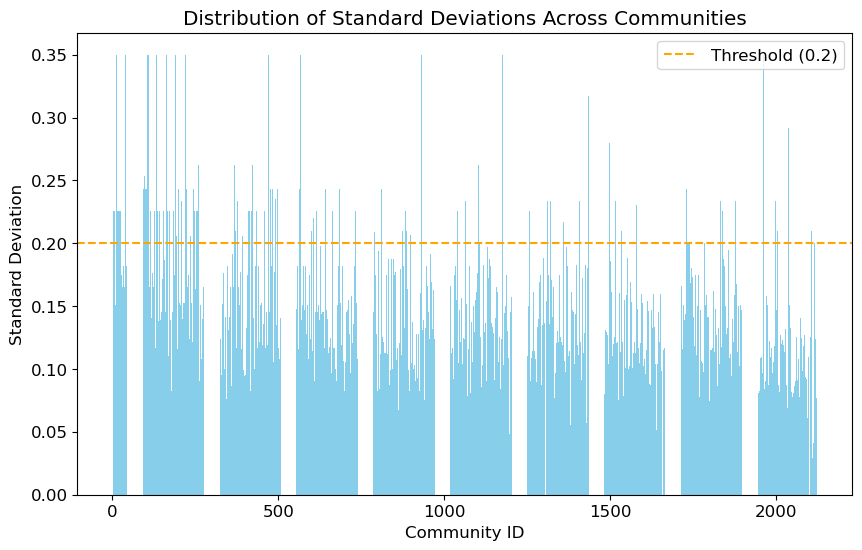

In [43]:
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Create a bar chart for standard deviations
plt.bar(list(community_dict.keys()), std_deviation_per_community, color='skyblue')

# Highlight communities with low standard deviation (e.g., below 0.2)
plt.axhline(y=threshold, color='orange', linestyle='--', label=f'Threshold ({threshold})')

plt.xlabel('Community ID')
plt.ylabel('Standard Deviation')
plt.title('Distribution of Standard Deviations Across Communities')
plt.legend()
plt.show()


In [39]:
# Calculate standard deviation for each community's distribution
std_deviation_per_community = np.std(overlap_coefficient_matrix, axis=1)

# Print or analyze the standard deviations
for community_id, std_deviation in zip(community_dict.keys(), std_deviation_per_community):
    print(f"Community {community_id} Standard Deviation: {std_deviation}")
    
# The members of each community tend to come from the same cluster 


Community 1 Standard Deviation: 0.3499271061118826
Community 2 Standard Deviation: 0.22587697572631282
Community 3 Standard Deviation: 0.2258769757263128
Community 4 Standard Deviation: 0.34992710611188266
Community 5 Standard Deviation: 0.22587697572631282
Community 6 Standard Deviation: 0.22587697572631282
Community 7 Standard Deviation: 0.2258769757263128
Community 8 Standard Deviation: 0.17496355305594133
Community 9 Standard Deviation: 0.15058465048420852
Community 10 Standard Deviation: 0.1649572197684645
Community 11 Standard Deviation: 0.23328473740792172
Community 12 Standard Deviation: 0.3499271061118826
Community 13 Standard Deviation: 0.34992710611188266
Community 14 Standard Deviation: 0.3499271061118826
Community 15 Standard Deviation: 0.22587697572631282
Community 16 Standard Deviation: 0.22587697572631282
Community 17 Standard Deviation: 0.22587697572631282
Community 18 Standard Deviation: 0.2258769757263128
Community 19 Standard Deviation: 0.22587697572631282
Community

Number of edges with the same cluster: 91486
Number of edges with the same community: 9668


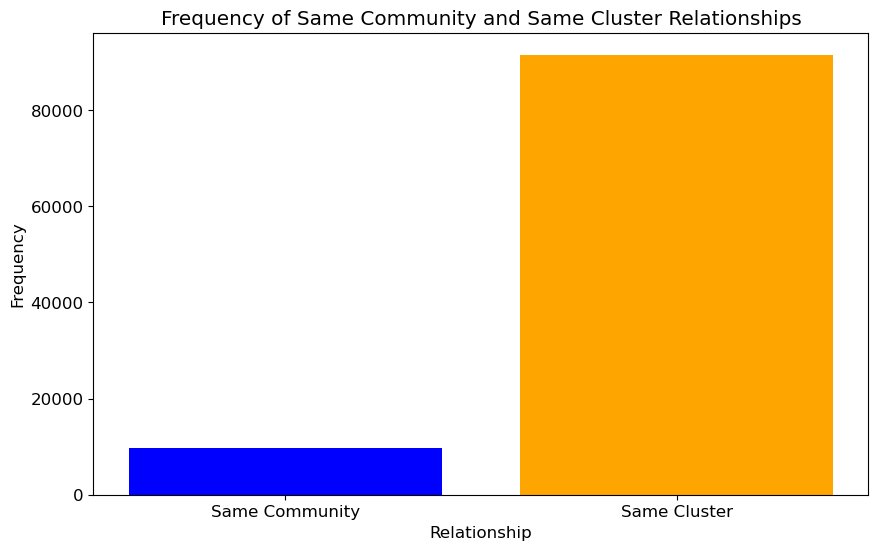

In [51]:
edges = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')

# Initialize counters
same_community_count = 0
same_cluster_count = 0

# Check if Source and Target Communities Belong to the Same Community
for _, edge in edges.iterrows():
    source_community = edge['SOURCE_SUBREDDIT']
    target_community = edge['TARGET_SUBREDDIT']

    for community, subreddits in community_dict.items():
        if source_community in subreddits and target_community in subreddits:
            same_community_count += 1
            break

# Check if Source and Target Communities Belong to the Same Cluster
for _, edge in edges.iterrows():
    source_community = edge['SOURCE_SUBREDDIT']
    target_community = edge['TARGET_SUBREDDIT']

    for cluster, subreddits in cluster_dict.items():
        if source_community in subreddits and target_community in subreddits:
            same_cluster_count += 1
            break

# Print the results
print(f"Number of edges with the same cluster: {same_cluster_count}")
print(f"Number of edges with the same community: {same_community_count}")


# Visualize the Results
labels = ['Same Community', 'Same Cluster']
counts = [same_community_count, same_cluster_count]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Relationship')
plt.ylabel('Frequency')
plt.title('Frequency of Same Community and Same Cluster Relationships')
plt.show()